# Foundations of Cyber-Physical Project (EDA)

EmotivPro v3.0 Data Analytics

`Project Members: Yu Xiang, Jie Peng, Trina , Luqman`

### Contents:

##### Data Preparation & Modelling
* 1.0 - Description of Data Set
* 1.1 - Import of Libraries 
* 1.2 - Retrieve/ Filter Required Columns
* 1.3 - Cleaning and combining data frames 
    - Performance Metrics
    - Beta Waves
    - All waves
* 1.4 Exploratory Data Analysis
    * 1.4.1 - Insight 1
    * 1.4.2 - Insight 2
    * 1.4.3 - Insight 3


## Section: 1.0 Description of Dataset
<b>For EDA, we will examine our main dataset which consists of Yu Xiang's brainwaves for 36 songs. </b>
- 6 Songs: Specified playlist (Happy birthday, Home, Unknown 1, Unknown 2, ...)
- 30 Songs: Selected english songs of different genres and artists 

<b>We will also briefly compare this with luqman's dataset of 6 songs.</b>
- 6 Songs: Specified playlist (Happy birthday, Home, Unknown 1, Unknown 2, ...)

## Section: 1.1 Import of Libaries required 


In [73]:
# General import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler, LabelEncoder 

#model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # pip install xgboost

In [74]:
# read data
# Trina' Directory: 
# df1 = pd.read_csv("Actual_data/4 Oct P1 - Cleaned.csv", low_memory=False)
# df2 = pd.read_csv("Actual_data/26 Sep P1 - Cleaned.csv",skiprows=[0], low_memory=False)
# df3 = pd.read_csv("Actual_data/26 Sep P2 - Cleaned.csv",skiprows=[0], low_memory=False)
# df4 = pd.read_csv("Actual_data/Oct 28 - Yuxiang - Cleaned.csv",low_memory=False)
# df5 = pd.read_csv("Actual_data/Oct 28 - Luqman - Cleaned.csv",skiprows=[0],low_memory=False)

# read data
# Trina' Directory: ##############################################################################
# df1 = pd.read_csv("Actual_data/4 Oct P1 - Cleaned.csv", low_memory=False)
# df2 = pd.read_csv("Actual_data/26 Sep P1 - Cleaned.csv",skiprows=[0], low_memory=False)
# df3 = pd.read_csv("Actual_data/26 Sep P2 - Cleaned.csv",skiprows=[0], low_memory=False)

# df4 = pd.read_csv("Actual_data/Oct 28 - Yuxiang - Cleaned.csv",low_memory=False)
# df5 = pd.read_csv("Actual_data/Oct 28 - Luqman - Cleaned.csv",skiprows=[0],low_memory=False)
# df6 = pd.read_csv("Actual_data/Oct 28 - Jiepeng - Cleaned.csv",skiprows=[0],low_memory=False)
# df6.drop(columns=["Unnamed: 178"], inplace=True)


# Yu Xiang's Directory: ##########################################################################
df1 = pd.read_csv("/Users/htreborn/CPS_Project_Data/4 Oct P1 - Cleaned.csv", low_memory=False)
df2 = pd.read_csv("/Users/htreborn/CPS_Project_Data/26 Sep P1 - Cleaned.csv",skiprows=[0], low_memory=False)
df3 = pd.read_csv("/Users/htreborn/CPS_Project_Data/26 Sep P2 - Cleaned.csv",skiprows=[0], low_memory=False)

df4 = pd.read_csv("/users/htreborn/CPS_Project_Data/Oct 28 - Yuxiang - Cleaned.csv", low_memory=False)
df5 = pd.read_csv("/users/htreborn/CPS_Project_Data/Oct 28 - Luqman - Cleaned.csv",skiprows=[0],low_memory=False)
df6 = pd.read_csv("/users/htreborn/CPS_Project_Data/Oct 28 - Jiepeng - Cleaned.csv",skiprows=[0],low_memory=False)
df6.drop(columns=["Unnamed: 178"], inplace=True)

# Luqman's Directory ###############################################################################
# df1 = pd.read_csv("26 Sep P1 - Cleaned.csv", skiprows=[0], low_memory=False)
# df2 = pd.read_csv("26 Sep P2 - Cleaned.csv", skiprows=[0], low_memory=False)
# df3 = pd.read_csv("4 Oct P1 - Cleaned.csv", skiprows=[0], low_memory=False)

# JiePeng's Directory ##############################################################################
# df1 = pd.read_csv("4 Oct P1 - Cleaned.csv", low_memory=False)
# df2 = pd.read_csv("26 Sep P1 - Cleaned.csv",skiprows=[0], low_memory=False)
# df3 = pd.read_csv("26 Sep P2 - Cleaned.csv",skiprows=[0], low_memory=False)

# df4 = pd.read_csv("Oct 28 - Yuxiang - Cleaned.csv",low_memory=False)
# df5 = pd.read_csv("Oct 28 - Luqman - Cleaned.csv",skiprows=[0],low_memory=False)
# df6 = pd.read_csv("Oct 28 - Jiepeng - Cleaned.csv",skiprows=[0],low_memory=False)
# df6.drop(columns=["Unnamed: 178"], inplace=True)

# df.shape

In [75]:
df1.shape

(299287, 181)

In [76]:
# NA rows end up being loaded for df2 (will be cleaned up later)
df2.shape

(1048574, 181)

In [77]:
df3.shape

(307779, 181)

In [78]:
# merge all data for yu xiang
df = pd.concat([df1, df2, df3, df4])

In [79]:
# check data 
df.head(5)

Timestamp  OriginalTimestamp  EEG.Counter  EEG.Interpolated  \
0  1.664866e+09       1.664866e+09        123.0               0.0   
1  1.664866e+09       1.664866e+09        124.0               0.0   
2  1.664866e+09       1.664866e+09        125.0               0.0   
3  1.664866e+09       1.664866e+09        126.0               0.0   
4  1.664866e+09       1.664866e+09        127.0               0.0   

       EEG.AF3       EEG.F7       EEG.F3      EEG.FC5       EEG.T7  \
0  4300.897461  4194.230957  4237.692383  4243.974121  4207.436035   
1  4323.077148  4214.615234  4259.487305  4261.666504  4232.307617   
2  4327.692383  4225.384766  4262.436035  4272.051270  4254.615234   
3  4320.897461  4219.743652  4257.563965  4272.436035  4253.077148   
4  4327.820313  4227.436035  4267.179688  4278.205078  4252.820313   

        EEG.P7  ...  POW.F8.BetaL  POW.F8.BetaH  POW.F8.Gamma  POW.AF4.Theta  \
0  4281.282227  ...      4.678126      4.285769      2.043869     314.035431   
1  4298.589844  ...           NaN           NaN           NaN            NaN   
2  4310.256348  ...           NaN           NaN           NaN            NaN   
3  4311.666504  ...           NaN           NaN           NaN            NaN   
4  4322.051270  ...           NaN           NaN           NaN            NaN   

   POW.AF4.Alpha  POW.AF4.BetaL  POW.AF4.BetaH  POW.AF4.Gamma  Target  Song  
0      29.363012       7.279921        2.84745       1.685915     NaN   NaN  
1            NaN            NaN            NaN            NaN     NaN   NaN  
2            NaN            NaN            NaN            NaN     NaN   NaN  
3            NaN            NaN            NaN            NaN     NaN   NaN  
4            NaN            NaN            NaN            NaN     NaN   NaN  

[5 rows x 181 columns]

In [80]:
df.shape

(2704215, 181)

In [81]:
# Dropping blank rows (e.g. from df 2)
df.dropna(how="all", inplace=True)

In [82]:
df.shape

(1805084, 181)

In [83]:
def dummy(charvalue):
    if charvalue == -1:
        return 0
    elif charvalue == 0:
        return 0
    elif charvalue == 1:
        return 1

df['Target'] = df['Target'].apply(dummy)
df5['Target'] = df5["Target"].apply(dummy)

## Section:1.2: Retrieve required columns 
Not all attributes are required for the modeling and analysis. Our group picked out several attributes based on what was shared by the partner group and our initial research that are likely to be more important. We grouped the attributes into 3 main dataframes:

- Performance Metrics (Emotiv's calculated measures from raw wave data) (pm_df)
- Beta Waves (Related to active concentration, most likely to be related to stimulation) (beta_df)
- All Waves (To evaluate other wave values and whether they are correlated with songs being stimulating) (other_brain_df)

After retrieving these columns, we combine them with other generally required attributes:
- EQ.OVERALL.New (Tracks quality of data collected)
- Target (Label if the song is stimulating/netural/not stimulating)
- Song (Tracks which rows belong to one song by recording song number) 

#### Performance Metrics (PM)
Only scaled values were retrieved. Others such as raw, min, max values were not used.

In [84]:
# Retrieve performance metrics (scaled values)
pm_scaled = [i for i in df if i.endswith('Scaled')]
pm_df = df[pm_scaled]
pm_df.head(5)

PM.Engagement.Scaled  PM.Excitement.Scaled  PM.Stress.Scaled  \
0              0.694674               0.94916          0.672699   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   PM.Relaxation.Scaled  PM.Interest.Scaled  PM.Focus.Scaled  
0              0.697059            0.491493         0.582412  
1                   NaN                 NaN              NaN  
2                   NaN                 NaN              NaN  
3                   NaN                 NaN              NaN  
4                   NaN                 NaN              NaN

In [85]:
# Check if data retrieved is correct
pm_df.shape

(1805084, 6)

#### Beta Waves 
We excluded other Brain Waves (Theta, Alpha, Gamma Waves), because Beta is the brain wave most linked Active Concentration, movement decision. [Explain what is Theta, Alpha, Gamma]

In [86]:
# Retrieve beta wave data (betaL, betaH)
betaL = [i for i in df if i.endswith('BetaL')]
betaH = [i for i in df if i.endswith('BetaH')]
beta_df = df[betaL+betaH]
beta_df.head(5)

POW.AF3.BetaL  POW.F7.BetaL  POW.F3.BetaL  POW.FC5.BetaL  POW.T7.BetaL  \
0       2.920882      5.018381      2.859705       2.563356       1.33929   
1            NaN           NaN           NaN            NaN           NaN   
2            NaN           NaN           NaN            NaN           NaN   
3            NaN           NaN           NaN            NaN           NaN   
4            NaN           NaN           NaN            NaN           NaN   

   POW.P7.BetaL  POW.O1.BetaL  POW.O2.BetaL  POW.P8.BetaL  POW.T8.BetaL  ...  \
0      1.686038      1.920614      2.625964      2.909043      6.331756  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

   POW.T7.BetaH  POW.P7.BetaH  POW.O1.BetaH  POW.O2.BetaH  POW.P8.BetaH  \
0      3.325217       2.66051      2.348201      2.799066      2.724114   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   POW.T8.BetaH  POW.FC6.BetaH  POW.F4.BetaH  POW.F8.BetaH  POW.AF4.BetaH  
0      5.957947       3.299247      4.192294      4.285769        2.84745  
1           NaN            NaN           NaN           NaN            NaN  
2           NaN            NaN           NaN           NaN            NaN  
3           NaN            NaN           NaN           NaN            NaN  
4           NaN            NaN           NaN           NaN            NaN  

[5 rows x 28 columns]

In [87]:
beta_df.shape

(1805084, 28)

#### All Waves 

Just to make sure not to miss out any correlations, we investigated all the brain waves as well to find any patterns with the Target label. Apart from Beta this also includes Alpha, Theta and Gamma waves.

In [88]:
# Data for all types of brainwaves and sensors
other_brain_waves = [i for i in df if i.startswith("POW")]
other_brain_df = df[other_brain_waves]
other_brain_df.head(5)

POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  POW.AF3.Gamma  \
0      82.891434      18.908918       2.920882       2.462026       1.168424   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   POW.F7.Theta  POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  POW.F7.Gamma  ...  \
0     93.962456     61.670925      5.018381      2.404911      1.384533  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

   POW.F8.Theta  POW.F8.Alpha  POW.F8.BetaL  POW.F8.BetaH  POW.F8.Gamma  \
0     113.23243     34.719418      4.678126      4.285769      2.043869   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   

   POW.AF4.Theta  POW.AF4.Alpha  POW.AF4.BetaL  POW.AF4.BetaH  POW.AF4.Gamma  
0     314.035431      29.363012       7.279921        2.84745       1.685915  
1            NaN            NaN            NaN            NaN            NaN  
2            NaN            NaN            NaN            NaN            NaN  
3            NaN            NaN            NaN            NaN            NaN  
4            NaN            NaN            NaN            NaN            NaN  

[5 rows x 70 columns]

In [89]:
other_brain_df.shape

(1805084, 70)

#### Additional columns required

* Add_df will contain EQ.OVERALL.New, Target and Song

In [90]:
# Retrieve any other data to piece the Dataset together
add_df = df[['EQ.OVERALL.New','Target','Song']]

In [91]:
add_df.shape

(1805084, 3)

## Section:1.3: Cleaning and combining dataframes

For each of the groups of attributes (PM, Beta, All waves), we perform the following steps:
1. Combine required data with additional columns (add_df)
2. Drop rows where EQ.OVERALL.New < 90 (ensure reliable data)

#### PM cleaning of dataset 

In [92]:
# PM
pmc_df = pd.concat([pm_df, add_df], axis=1)
pmc_df.head(5)

PM.Engagement.Scaled  PM.Excitement.Scaled  PM.Stress.Scaled  \
0              0.694674               0.94916          0.672699   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   PM.Relaxation.Scaled  PM.Interest.Scaled  PM.Focus.Scaled  EQ.OVERALL.New  \
0              0.697059            0.491493         0.582412             0.0   
1                   NaN                 NaN              NaN             0.0   
2                   NaN                 NaN              NaN             0.0   
3                   NaN                 NaN              NaN             0.0   
4                   NaN                 NaN              NaN             0.0   

   Target  Song  
0     NaN   NaN  
1     NaN   NaN  
2     NaN   NaN  
3     NaN   NaN  
4     NaN   NaN

In [93]:
pmc_df.shape

(1805084, 9)

In [94]:
# Remove if any NA or EQ.OVERALL.NEW < 90
pmc_df.dropna(how="any", axis=0, inplace=True)
pmc_df = pmc_df.drop(pmc_df[pmc_df["EQ.OVERALL.New"] < 90].index)
pmc_df["Song"].value_counts().sort_index()
pmc_df.head(5)

PM.Engagement.Scaled  PM.Excitement.Scaled  PM.Stress.Scaled  \
14336              0.806924              0.660965          0.969186   
14464              0.772661              0.577382          0.934792   
14528              0.752546              0.525899          0.911572   
14592              0.741447              0.483556          0.883894   
14976              0.708525              0.297294          0.674149   

       PM.Relaxation.Scaled  PM.Interest.Scaled  PM.Focus.Scaled  \
14336              0.610285            0.517222         0.545122   
14464              0.506862            0.489027         0.587190   
14528              0.472368            0.483508         0.596452   
14592              0.453594            0.481513         0.595686   
14976              0.345465            0.466987         0.567835   

       EQ.OVERALL.New  Target  Song  
14336       91.666664     0.0   1.0  
14464      100.000000     0.0   1.0  
14528      100.000000     0.0   1.0  
14592      100.000000     0.0   1.0  
14976      100.000000     0.0   1.0

In [95]:
pmc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6024 entries, 14336 to 148517
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PM.Engagement.Scaled  6024 non-null   float64
 1   PM.Excitement.Scaled  6024 non-null   float64
 2   PM.Stress.Scaled      6024 non-null   float64
 3   PM.Relaxation.Scaled  6024 non-null   float64
 4   PM.Interest.Scaled    6024 non-null   float64
 5   PM.Focus.Scaled       6024 non-null   float64
 6   EQ.OVERALL.New        6024 non-null   float64
 7   Target                6024 non-null   float64
 8   Song                  6024 non-null   float64
dtypes: float64(9)
memory usage: 470.6 KB


#### Beta Waves cleaning of dataset

In [96]:
# Beta
betac_df = pd.concat([beta_df, add_df], axis=1)
betac_df.head()

POW.AF3.BetaL  POW.F7.BetaL  POW.F3.BetaL  POW.FC5.BetaL  POW.T7.BetaL  \
0       2.920882      5.018381      2.859705       2.563356       1.33929   
1            NaN           NaN           NaN            NaN           NaN   
2            NaN           NaN           NaN            NaN           NaN   
3            NaN           NaN           NaN            NaN           NaN   
4            NaN           NaN           NaN            NaN           NaN   

   POW.P7.BetaL  POW.O1.BetaL  POW.O2.BetaL  POW.P8.BetaL  POW.T8.BetaL  ...  \
0      1.686038      1.920614      2.625964      2.909043      6.331756  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

   POW.O2.BetaH  POW.P8.BetaH  POW.T8.BetaH  POW.FC6.BetaH  POW.F4.BetaH  \
0      2.799066      2.724114      5.957947       3.299247      4.192294   
1           NaN           NaN           NaN            NaN           NaN   
2           NaN           NaN           NaN            NaN           NaN   
3           NaN           NaN           NaN            NaN           NaN   
4           NaN           NaN           NaN            NaN           NaN   

   POW.F8.BetaH  POW.AF4.BetaH  EQ.OVERALL.New  Target  Song  
0      4.285769        2.84745             0.0     NaN   NaN  
1           NaN            NaN             0.0     NaN   NaN  
2           NaN            NaN             0.0     NaN   NaN  
3           NaN            NaN             0.0     NaN   NaN  
4           NaN            NaN             0.0     NaN   NaN  

[5 rows x 31 columns]

In [97]:
betac_df.shape

(1805084, 31)

In [98]:
# Remove if any NA or EQ.OVERALL.NEW < 90
betac_df.dropna(how="any", axis=0, inplace=True)
betac_df = betac_df.drop(betac_df[betac_df["EQ.OVERALL.New"] < 90].index).dropna()
betac_df["Song"].value_counts().sort_index()
betac_df.head()

POW.AF3.BetaL  POW.F7.BetaL  POW.F3.BetaL  POW.FC5.BetaL  POW.T7.BetaL  \
14336       0.291856      0.806593      0.216883       0.368497      0.289156   
14352       0.297640      0.985339      0.198240       0.300189      0.243848   
14368       0.323990      1.113016      0.181638       0.239643      0.203473   
14384       0.364966      1.153142      0.177046       0.205866      0.175532   
14464       0.888375      0.616139      0.850566       0.618687      0.313485   

       POW.P7.BetaL  POW.O1.BetaL  POW.O2.BetaL  POW.P8.BetaL  POW.T8.BetaL  \
14336      0.317117      0.436535      0.410119      0.220459      0.469042   
14352      0.251670      0.376036      0.555659      0.252427      0.577676   
14368      0.197483      0.336846      0.723103      0.292341      0.668125   
14384      0.167725      0.333368      0.874906      0.342602      0.727792   
14464      0.297490      0.671525      0.852147      0.850851      1.531254   

       ...  POW.O2.BetaH  POW.P8.BetaH  POW.T8.BetaH  POW.FC6.BetaH  \
14336  ...      0.457197      0.431710      0.580375       0.739434   
14352  ...      0.511034      0.443226      0.581711       0.741887   
14368  ...      0.538459      0.434744      0.558117       0.699171   
14384  ...      0.528055      0.405832      0.509117       0.617686   
14464  ...      0.342714      0.296099      0.230359       0.375817   

       POW.F4.BetaH  POW.F8.BetaH  POW.AF4.BetaH  EQ.OVERALL.New  Target  Song  
14336      0.586522      0.575742       0.292627       91.666664     0.0   1.0  
14352      0.600415      0.574014       0.300583       91.666664     0.0   1.0  
14368      0.602544      0.549737       0.307051       91.666664     0.0   1.0  
14384      0.578702      0.507965       0.307365       91.666664     0.0   1.0  
14464      0.453209      0.354055       0.282638      100.000000     0.0   1.0  

[5 rows x 31 columns]

In [99]:
betac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24077 entries, 14336 to 148565
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   POW.AF3.BetaL   24077 non-null  float64
 1   POW.F7.BetaL    24077 non-null  float64
 2   POW.F3.BetaL    24077 non-null  float64
 3   POW.FC5.BetaL   24077 non-null  float64
 4   POW.T7.BetaL    24077 non-null  float64
 5   POW.P7.BetaL    24077 non-null  float64
 6   POW.O1.BetaL    24077 non-null  float64
 7   POW.O2.BetaL    24077 non-null  float64
 8   POW.P8.BetaL    24077 non-null  float64
 9   POW.T8.BetaL    24077 non-null  float64
 10  POW.FC6.BetaL   24077 non-null  float64
 11  POW.F4.BetaL    24077 non-null  float64
 12  POW.F8.BetaL    24077 non-null  float64
 13  POW.AF4.BetaL   24077 non-null  float64
 14  POW.AF3.BetaH   24077 non-null  float64
 15  POW.F7.BetaH    24077 non-null  float64
 16  POW.F3.BetaH    24077 non-null  float64
 17  POW.FC5.BetaH   24077 non-

#### All Waves cleaning of dataset

In [100]:
# All waves
POW_df = pd.concat([other_brain_df, add_df], axis=1)
POW_df.head(5)

POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  POW.AF3.Gamma  \
0      82.891434      18.908918       2.920882       2.462026       1.168424   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   POW.F7.Theta  POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  POW.F7.Gamma  ...  \
0     93.962456     61.670925      5.018381      2.404911      1.384533  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2           NaN           NaN           NaN           NaN           NaN  ...   
3           NaN           NaN           NaN           NaN           NaN  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

   POW.F8.BetaH  POW.F8.Gamma  POW.AF4.Theta  POW.AF4.Alpha  POW.AF4.BetaL  \
0      4.285769      2.043869     314.035431      29.363012       7.279921   
1           NaN           NaN            NaN            NaN            NaN   
2           NaN           NaN            NaN            NaN            NaN   
3           NaN           NaN            NaN            NaN            NaN   
4           NaN           NaN            NaN            NaN            NaN   

   POW.AF4.BetaH  POW.AF4.Gamma  EQ.OVERALL.New  Target  Song  
0        2.84745       1.685915             0.0     NaN   NaN  
1            NaN            NaN             0.0     NaN   NaN  
2            NaN            NaN             0.0     NaN   NaN  
3            NaN            NaN             0.0     NaN   NaN  
4            NaN            NaN             0.0     NaN   NaN  

[5 rows x 73 columns]

In [101]:
POW_df.shape

(1805084, 73)

In [102]:
POW_df.dropna(how="any", axis=0, inplace=True)
POW_df = POW_df.drop(POW_df[POW_df["EQ.OVERALL.New"] < 90].index).dropna()
POW_df.head()

POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
14336       9.401283       0.523304       0.291856       0.266432   
14352      15.522772       0.525828       0.297640       0.226419   
14368      21.853762       0.520928       0.323990       0.200602   
14384      26.345743       0.532440       0.364966       0.191223   
14464       8.117851       0.975523       0.888375       0.253655   

       POW.AF3.Gamma  POW.F7.Theta  POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  \
14336       0.112071     15.248770      2.398155      0.806593      0.413721   
14352       0.099932     14.218265      2.603230      0.985339      0.350578   
14368       0.099235     12.789041      2.757191      1.113016      0.300584   
14384       0.107307     11.122143      2.846779      1.153142      0.271125   
14464       0.165921     21.588953      4.130900      0.616139      0.326287   

       POW.F7.Gamma  ...  POW.F8.BetaH  POW.F8.Gamma  POW.AF4.Theta  \
14336      0.175000  ...      0.575742      0.229186       1.864016   
14352      0.177499  ...      0.574014      0.232232       2.078890   
14368      0.181342  ...      0.549737      0.233787       2.124187   
14384      0.183708  ...      0.507965      0.232618       1.996677   
14464      0.197880  ...      0.354055      0.261797       1.586329   

       POW.AF4.Alpha  POW.AF4.BetaL  POW.AF4.BetaH  POW.AF4.Gamma  \
14336       0.813742       0.209914       0.292627       0.094594   
14352       0.715427       0.184647       0.300583       0.098840   
14368       0.592734       0.181434       0.307051       0.108770   
14384       0.507211       0.206316       0.307365       0.122329   
14464       0.962525       0.815854       0.282638       0.209597   

       EQ.OVERALL.New  Target  Song  
14336       91.666664     0.0   1.0  
14352       91.666664     0.0   1.0  
14368       91.666664     0.0   1.0  
14384       91.666664     0.0   1.0  
14464      100.000000     0.0   1.0  

[5 rows x 73 columns]

In [103]:
POW_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24077 entries, 14336 to 148565
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   POW.AF3.Theta   24077 non-null  float64
 1   POW.AF3.Alpha   24077 non-null  float64
 2   POW.AF3.BetaL   24077 non-null  float64
 3   POW.AF3.BetaH   24077 non-null  float64
 4   POW.AF3.Gamma   24077 non-null  float64
 5   POW.F7.Theta    24077 non-null  float64
 6   POW.F7.Alpha    24077 non-null  float64
 7   POW.F7.BetaL    24077 non-null  float64
 8   POW.F7.BetaH    24077 non-null  float64
 9   POW.F7.Gamma    24077 non-null  float64
 10  POW.F3.Theta    24077 non-null  float64
 11  POW.F3.Alpha    24077 non-null  float64
 12  POW.F3.BetaL    24077 non-null  float64
 13  POW.F3.BetaH    24077 non-null  float64
 14  POW.F3.Gamma    24077 non-null  float64
 15  POW.FC5.Theta   24077 non-null  float64
 16  POW.FC5.Alpha   24077 non-null  float64
 17  POW.FC5.BetaL   24077 non-

## Section: 1.4 Exploratory Data Analysis 

### Section 1.4.1: Performance measure and Target values
Relation between performance measures and target label.
- Barplot (mean)
- Boxplot (understand distribution of data)


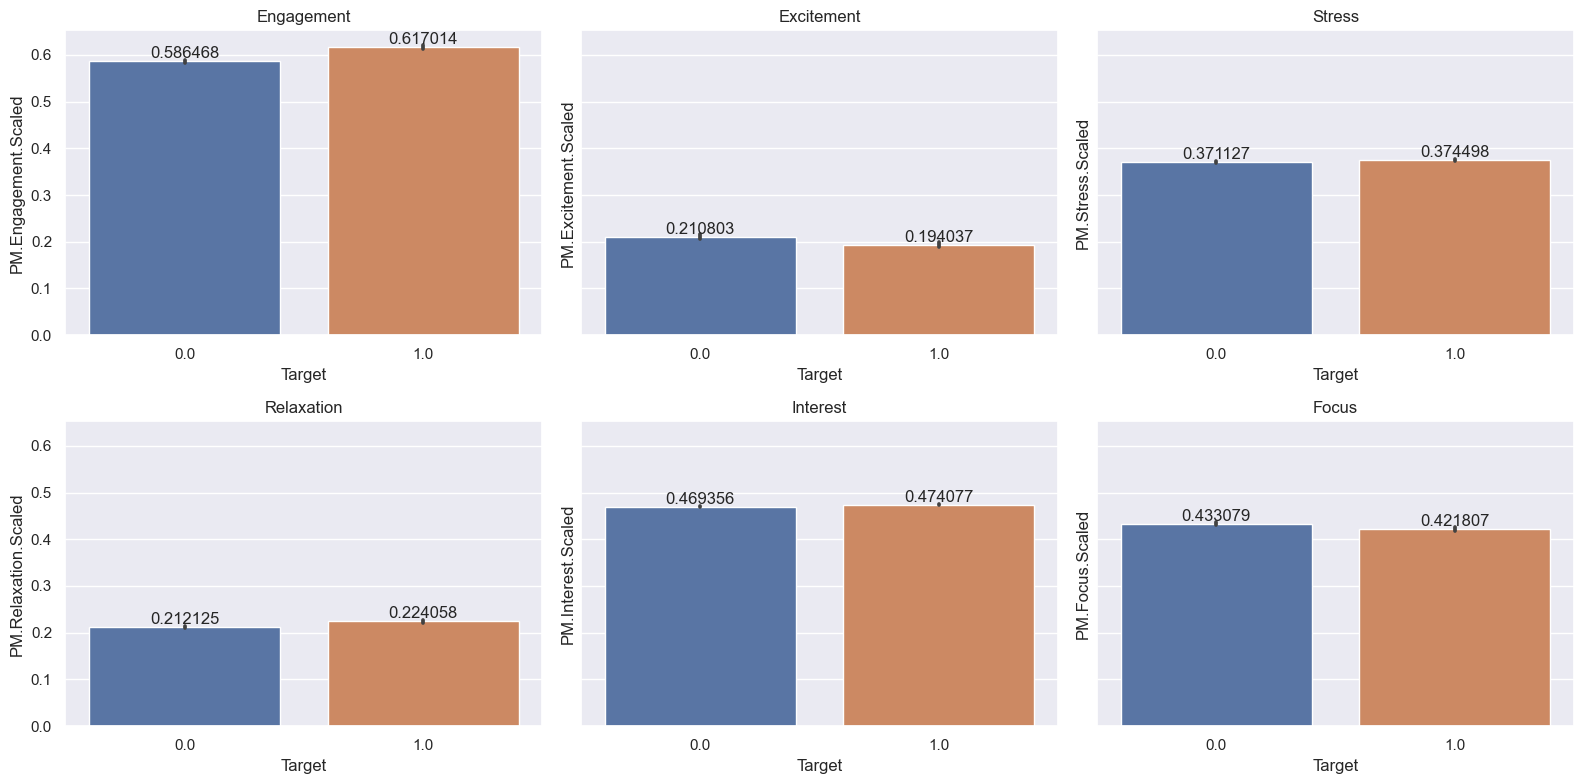

In [104]:
# Check relationship using barplots 
# Set Axes for multiple plots
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(16,8))

# Label axes
axes[0, 0].set_title('Engagement')
axes[0, 1].set_title('Excitement')
axes[0, 2].set_title('Stress')
axes[1, 0].set_title('Relaxation')
axes[1, 1].set_title('Interest')
axes[1, 2].set_title('Focus')

sns.set(font_scale=1)
# Barplot for each Performance Measure (PM)
bar1 = sns.barplot(data=pmc_df, x='Target', y="PM.Engagement.Scaled", ax=axes[0, 0])
bar2 = sns.barplot(data=pmc_df, x='Target', y="PM.Excitement.Scaled", ax=axes[0, 1])
bar3 = sns.barplot(data=pmc_df, x='Target', y="PM.Stress.Scaled", ax=axes[0, 2])
bar4 = sns.barplot(data=pmc_df, x='Target', y="PM.Relaxation.Scaled", ax=axes[1, 0])
bar5 = sns.barplot(data=pmc_df, x='Target', y="PM.Interest.Scaled", ax=axes[1, 1])
bar6 = sns.barplot(data=pmc_df, x='Target', y="PM.Focus.Scaled", ax=axes[1, 2])

bar_list = [bar1, bar2, bar3, bar4, bar5, bar6]

for bar in bar_list:
    for l in bar.containers:
        bar.bar_label(l,)
    

fig.tight_layout()

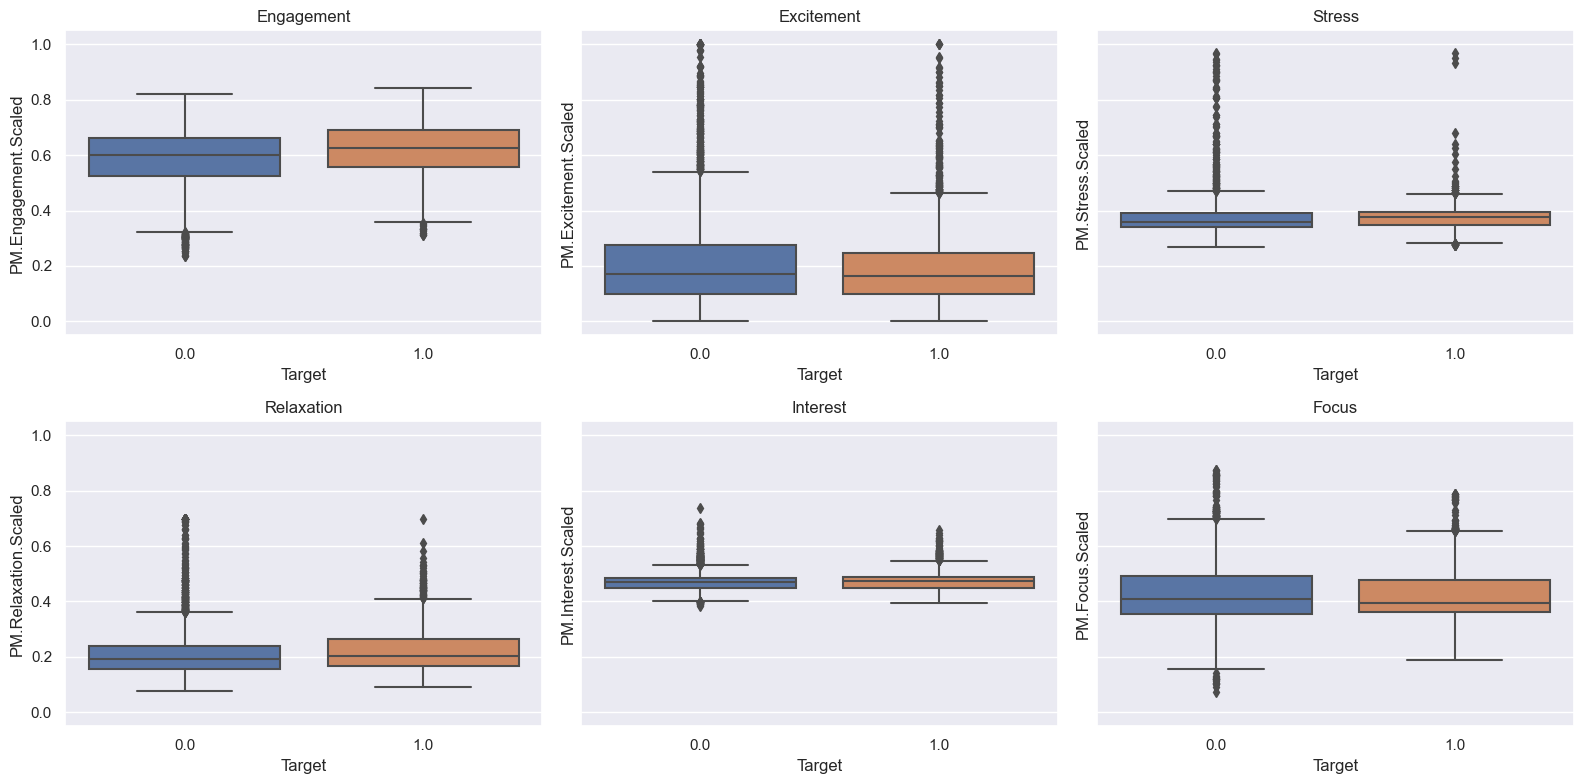

In [105]:
# Check distribution using boxplots
# Set Axes for multiple plots
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(16,8))

# Label axes
axes[0, 0].set_title('Engagement')
axes[0, 1].set_title('Excitement')
axes[0, 2].set_title('Stress')
axes[1, 0].set_title('Relaxation')
axes[1, 1].set_title('Interest')
axes[1, 2].set_title('Focus')

sns.set(font_scale=1)
# Plot for each Performance Measure (PM)
sns.boxplot(data=pmc_df, x='Target', y="PM.Engagement.Scaled", ax=axes[0, 0])
sns.boxplot(data=pmc_df, x='Target', y="PM.Excitement.Scaled", ax=axes[0, 1])
sns.boxplot(data=pmc_df, x='Target', y="PM.Stress.Scaled", ax=axes[0, 2])
sns.boxplot(data=pmc_df, x='Target', y="PM.Relaxation.Scaled", ax=axes[1, 0])
sns.boxplot(data=pmc_df, x='Target', y="PM.Interest.Scaled", ax=axes[1, 1])
sns.boxplot(data=pmc_df, x='Target', y="PM.Focus.Scaled", ax=axes[1, 2])

fig.tight_layout()

### Section 1.4.2: Brainwaves and Target values
Relation between other brainwaves and target values.

- Section 1: Creating relevant datasets and cleaning the data
    - Individual brain waves (A, BL, BH, G, T)
- Section 2: Analysis by brainwaves (A, BL, BH, G, T)
    - Aggregated barplot (across all sensors)
    - Aggregated boxplot (across all sensors)
- Section 3: Analysis by brainwaves (A, BL, BH, G, T) and sensors 
    - Barplot 
    - Correlation heatmap 

#### Section 1: Creating relevant datasets and cleaning the data 

In [106]:
# Collect respective wave dfs 
# Alpha
alpha = [i for i in df if i.endswith("Alpha")]
alphat = alpha + ['Target']
alphat_df = POW_df[alphat] 

# Beta 
betaLt = betaL + ['Target']
betaHt = betaH + ['Target']
betaLt_df = POW_df[betaLt]
betaHt_df = POW_df[betaHt]

# Gamma
gamma = [i for i in df if i.endswith("Gamma")]
gammat = gamma + ['Target']
gammat_df = POW_df[gammat]

# Theta
theta = [i for i in df if i.endswith("Theta")]
thetat = theta + ['Target']
thetat_df = POW_df[thetat]

#### Section 2: Analysis by brainwaves (A, BL, BH, G, T)
Calculate mean by rows/aggregate across all the sensors for one row and plot barplot and boxplot.

In [107]:
# Create mean column (across sensors for each row) - mean of each row required if boxplot is to be shown 
alphat_df['sensor_mean'] = alphat_df.drop(['Target'], axis=1).mean(axis=1)
betaLt_df['sensor_mean'] = betaLt_df.drop(['Target'], axis=1).mean(axis=1)
betaHt_df['sensor_mean'] = betaHt_df.drop(['Target'], axis=1).mean(axis=1)
gammat_df['sensor_mean'] = gammat_df.drop(['Target'], axis=1).mean(axis=1)
thetat_df['sensor_mean'] = thetat_df.drop(['Target'], axis=1).mean(axis=1)

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_7618/1590305575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alphat_df['sensor_mean'] = alphat_df.drop(['Target'], axis=1).mean(axis=1)
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_7618/1590305575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betaLt_df['sensor_mean'] = betaLt_df.drop(['Target'], axis=1).mean(axis=1)
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_7618/1590305575.py:4: SettingWithCopyWarning: 
A 

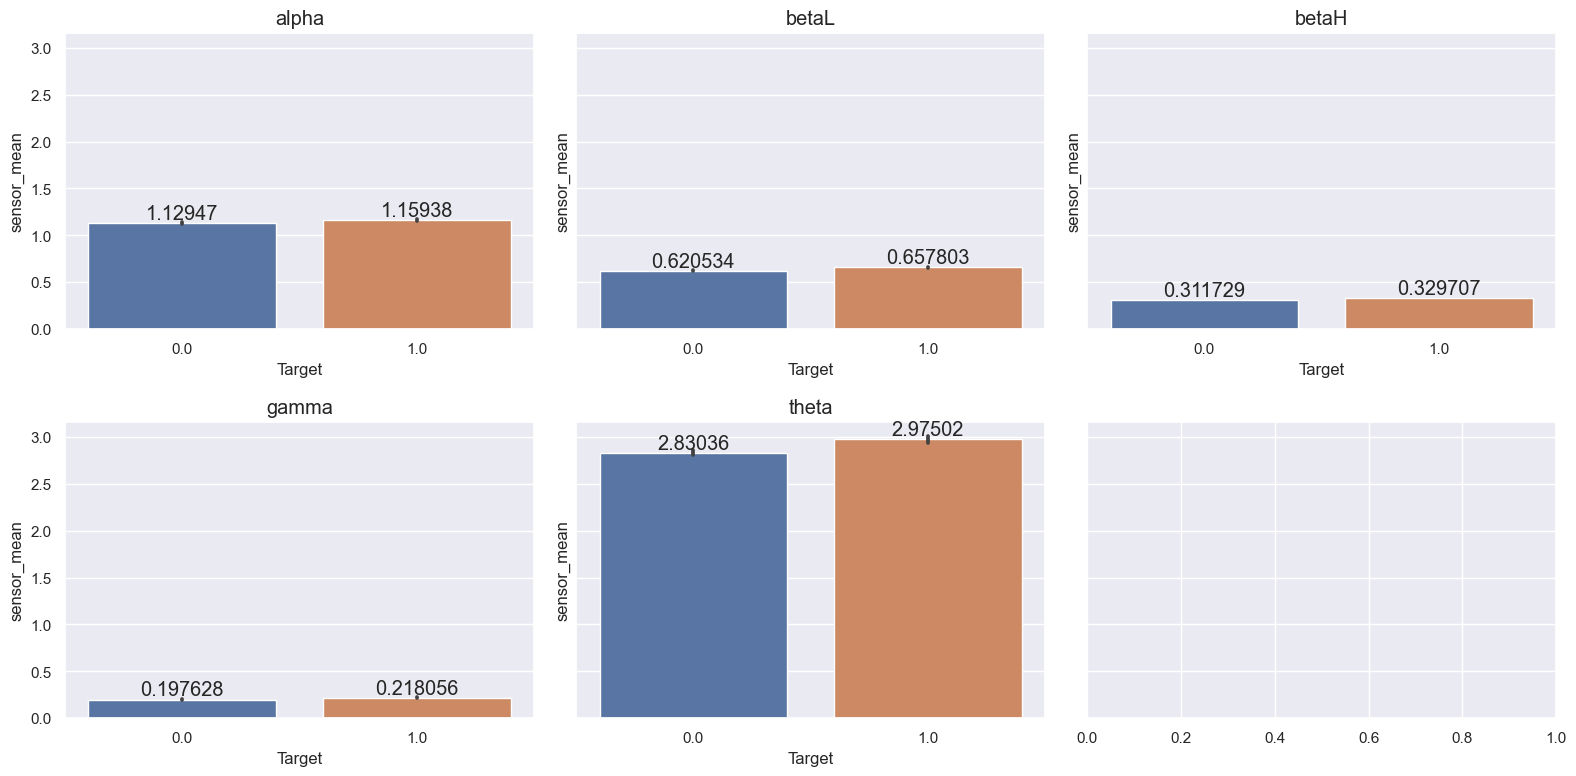

In [108]:
# Barplot of sensor mean data for each type of brainwave
fig, axes = plt.subplots(2, 3, figsize=(16,8), sharey=True)

i = 0
j = 0
counter = 0
wave_title = ['alpha','betaL','betaH','gamma','theta']

sns.set(font_scale=1.2)

for wave in [alphat_df, betaLt_df, betaHt_df, gammat_df, thetat_df]:

    bar = sns.barplot(data=wave, x="Target", y="sensor_mean", ax=axes[i, j])
    axes[i, j].set_title(wave_title[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
        
    if j != 2:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

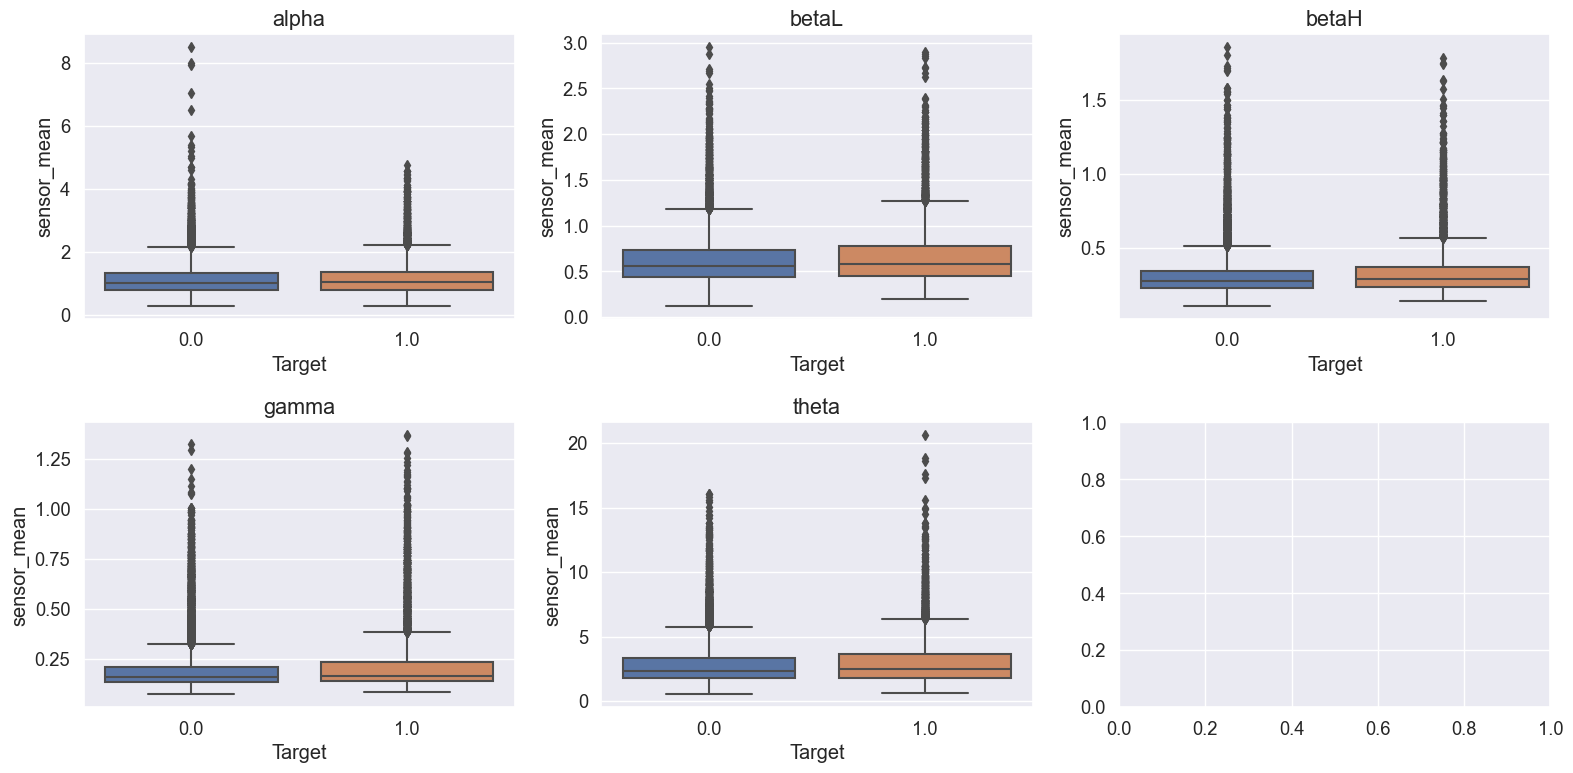

In [109]:
# Boxplot of sensor mean data for each type of brainwave
fig, axes = plt.subplots(2, 3, figsize=(16,8))

i = 0
j = 0
counter = 0
wave_title = ['alpha','betaL','betaH','gamma','theta']


sns.set(font_scale=1.3)

for wave in [alphat_df, betaLt_df, betaHt_df, gammat_df, thetat_df]:

    sns.boxplot(data=wave, x="Target", y="sensor_mean", ax=axes[i, j])
    axes[i, j].set_title(wave_title[counter])
    counter += 1
    
    if j != 2:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

In [110]:
alphat_df.describe()

POW.AF3.Alpha  POW.F7.Alpha  POW.F3.Alpha  POW.FC5.Alpha  POW.T7.Alpha  \
count   24077.000000  24077.000000  24077.000000   24077.000000  24077.000000   
mean        1.148859      1.379910      1.085957       0.924882      0.475010   
std         0.725911      1.088133      0.674341       0.610981      0.302497   
min         0.083347      0.104510      0.094353       0.065519      0.040506   
25%         0.661357      0.698539      0.627046       0.527163      0.280921   
50%         0.967161      1.081604      0.920293       0.770038      0.405348   
75%         1.423069      1.719272      1.352907       1.135583      0.586014   
max        10.261637     30.774603      8.114281       8.158617      4.420929   

       POW.P7.Alpha  POW.O1.Alpha  POW.O2.Alpha  POW.P8.Alpha  POW.T8.Alpha  \
count  24077.000000  24077.000000  24077.000000  24077.000000  24077.000000   
mean       0.376921      0.876346      1.343551      1.020758      1.087794   
std        0.244868      0.619778      0.895791      0.598262      0.881109   
min        0.021926      0.062068      0.098100      0.086265      0.088331   
25%        0.224629      0.518296      0.803479      0.620928      0.612463   
50%        0.323655      0.765022      1.160392      0.892418      0.883086   
75%        0.460708      1.090941      1.667663      1.265624      1.288607   
max        3.577787     33.468246     31.021408     10.213229     26.199842   

       POW.FC6.Alpha  POW.F4.Alpha  POW.F8.Alpha  POW.AF4.Alpha        Target  \
count   24077.000000  24077.000000  24077.000000   24077.000000  24077.000000   
mean        1.452606      1.766935      1.842032       1.180422      0.356814   
std         0.893472      1.079653      1.335636       0.834669      0.479069   
min         0.154740      0.116119      0.153482       0.088327      0.000000   
25%         0.841798      1.023486      0.946446       0.640701      0.000000   
50%         1.231638      1.503897      1.460922       0.981771      0.000000   
75%         1.812011      2.208248      2.318544       1.478728      1.000000   
max         9.725040     11.144293     14.290606      20.653130      1.000000   

        sensor_mean  
count  24077.000000  
mean       1.140142  
std        0.530379  
min        0.288950  
25%        0.786814  
50%        1.018076  
75%        1.345377  
max        8.490593

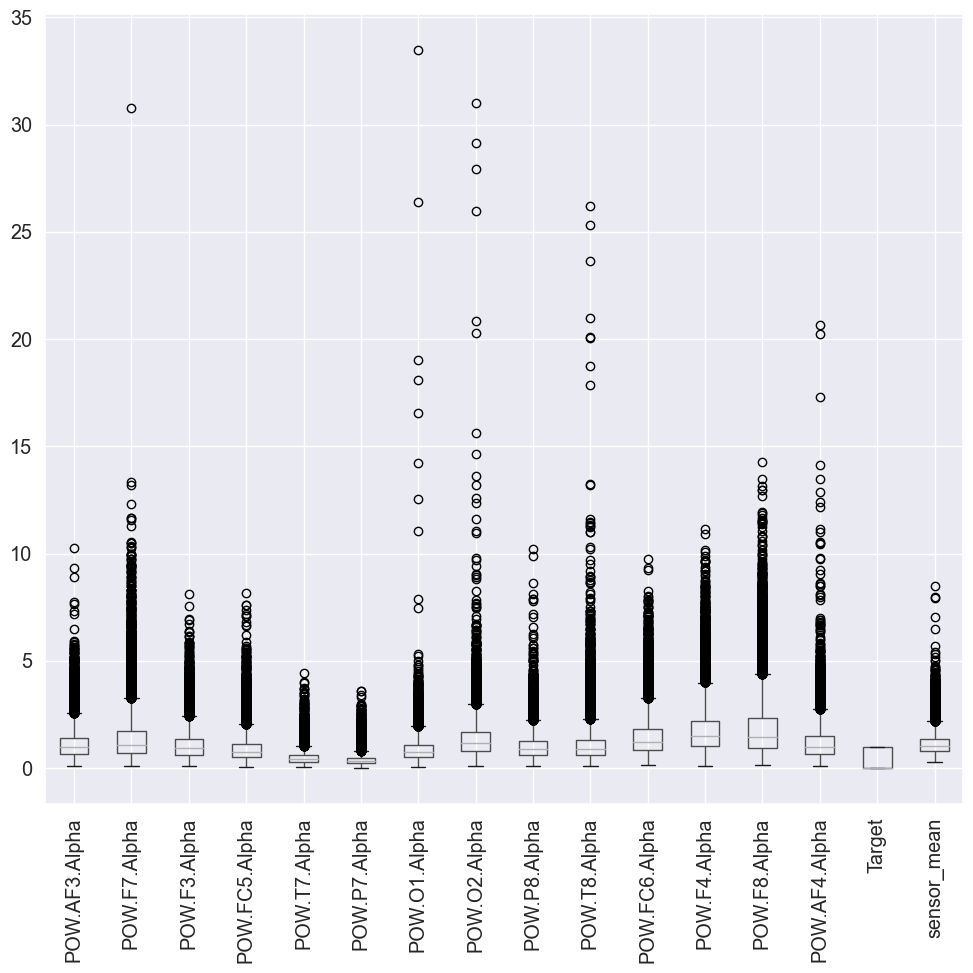

In [111]:
# Range of each sensor is different (perhaps should not aggregate to compare)
alphat_df.boxplot(figsize=(10, 10))
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Section 3: Analysis by brainwaves (A, BL, BH, G, T) and sensors 

In [112]:
# Creating list of sensors 
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
len(sensor_list)

14

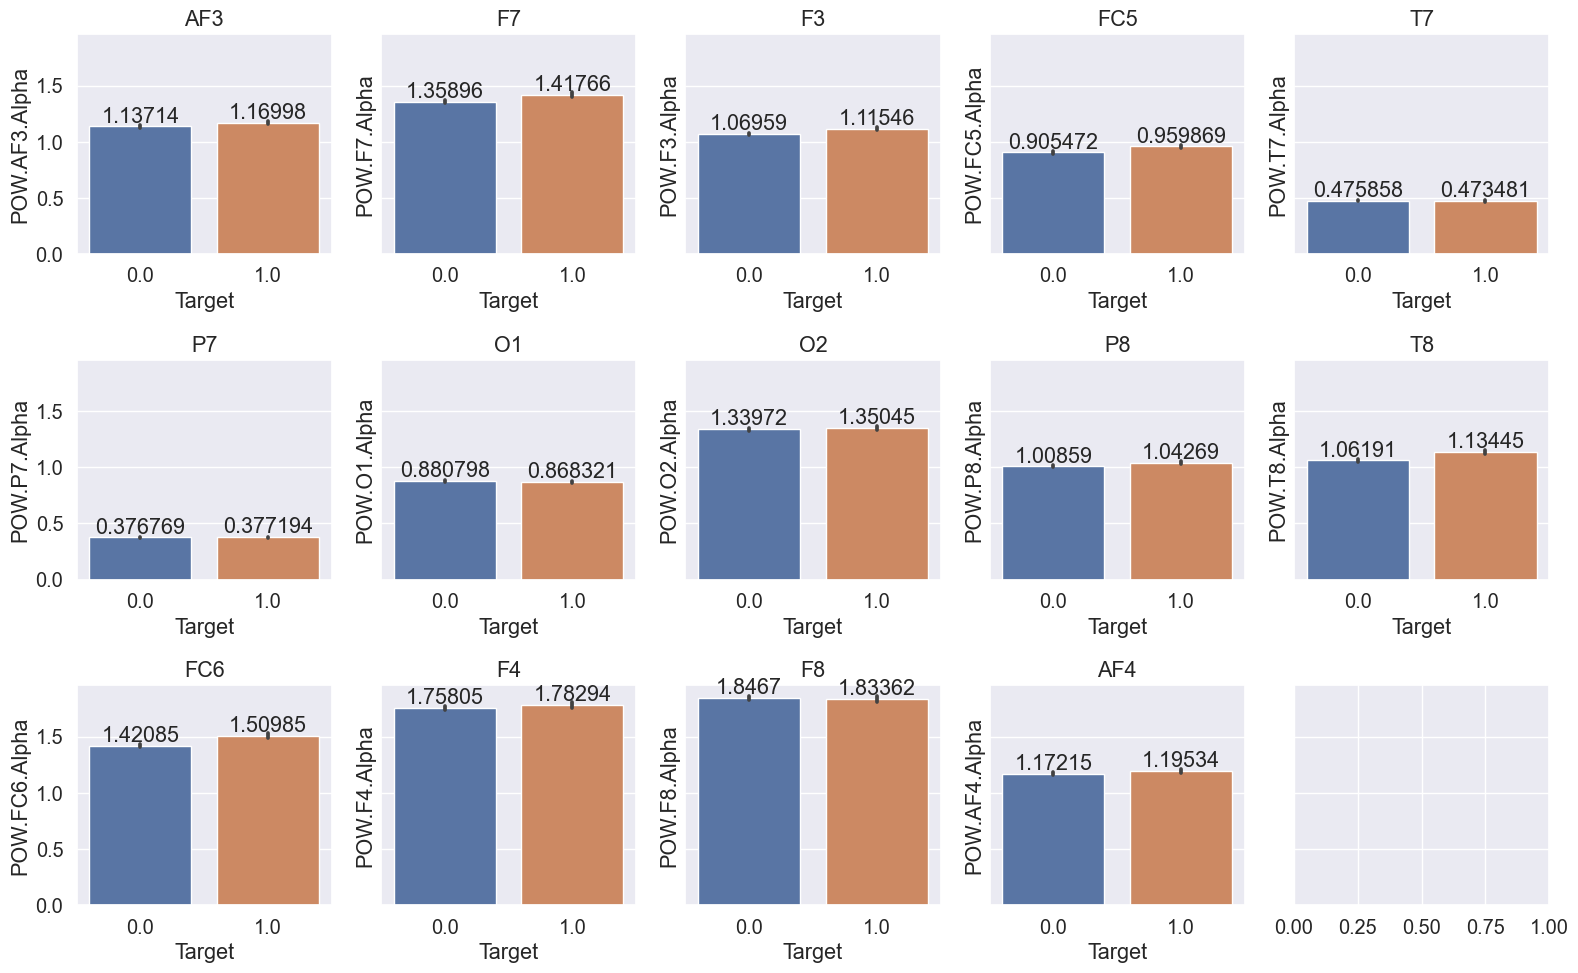

In [113]:
# ALPHA barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.Alpha'
    bar = sns.barplot(data=alphat_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

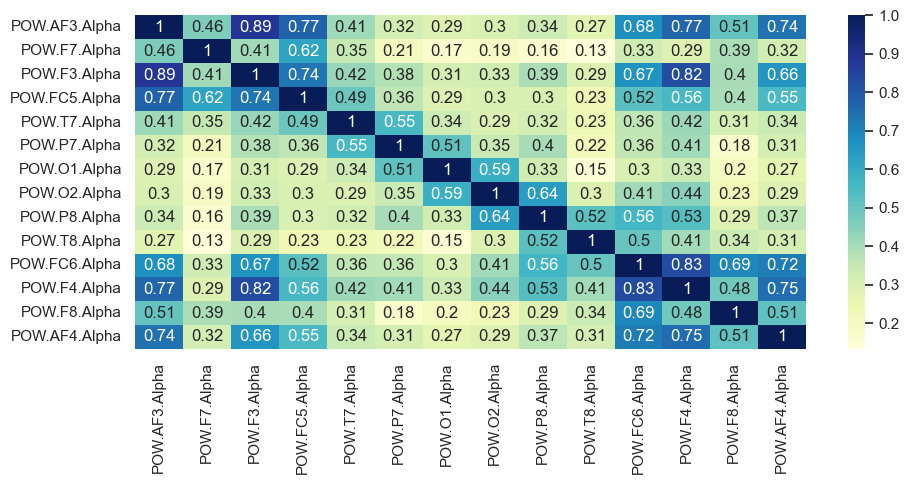

In [114]:
# ALPHA Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(alphat_df[alpha].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

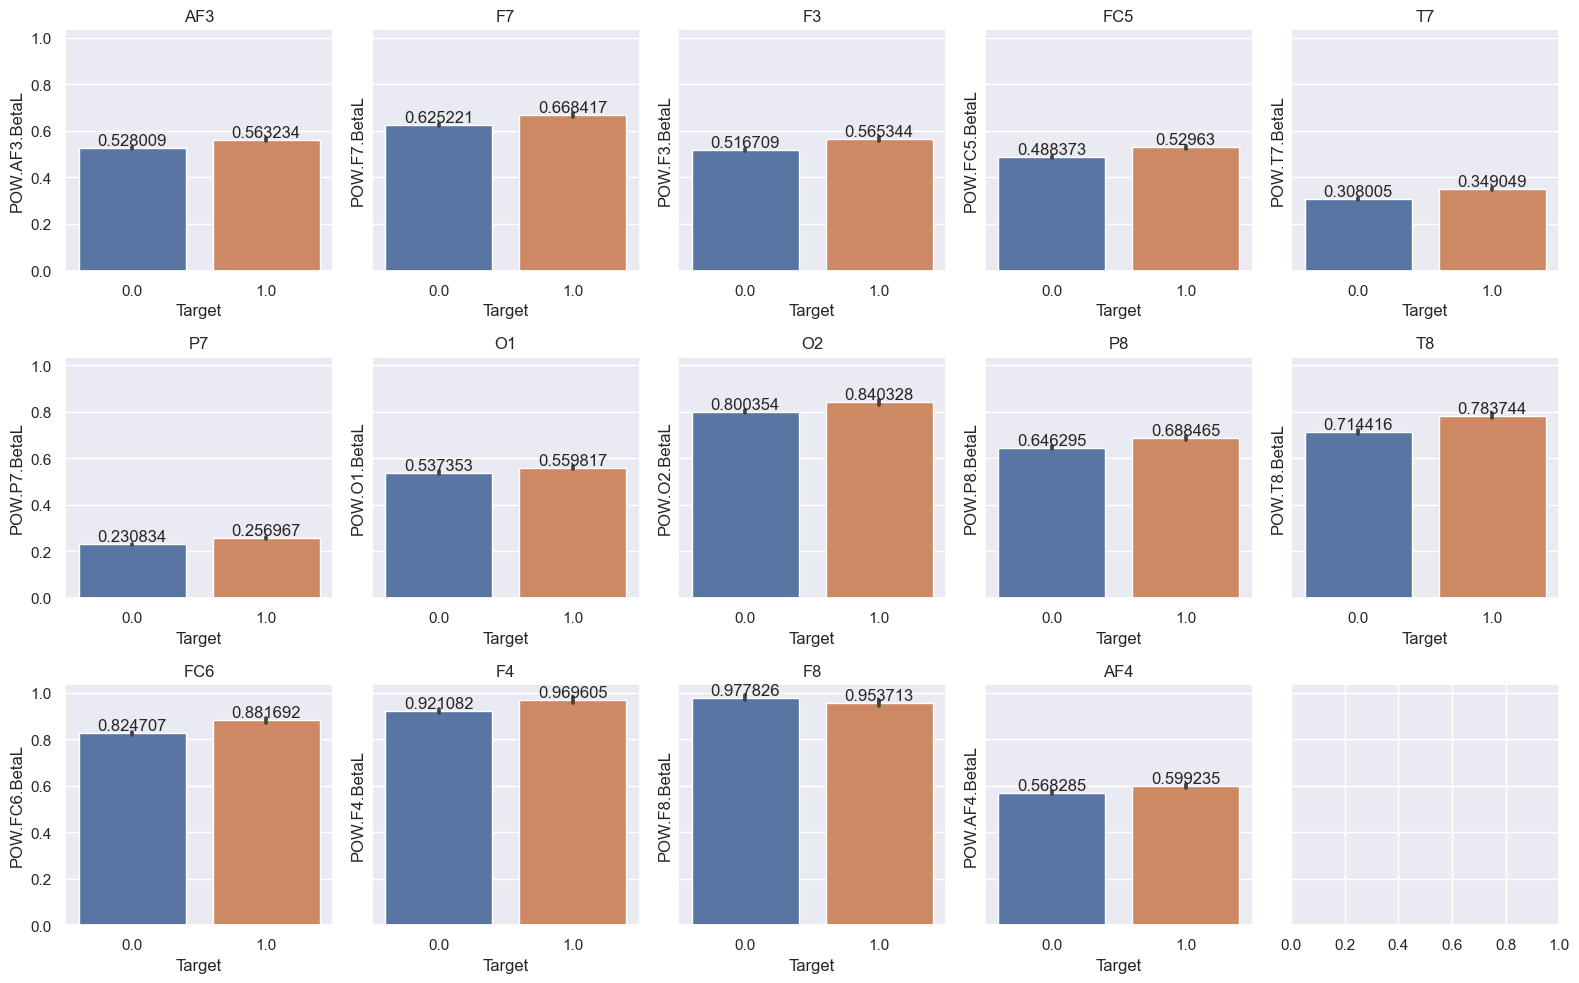

In [115]:
# BETAL barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.BetaL'
    bar = sns.barplot(data=betaLt_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
        
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

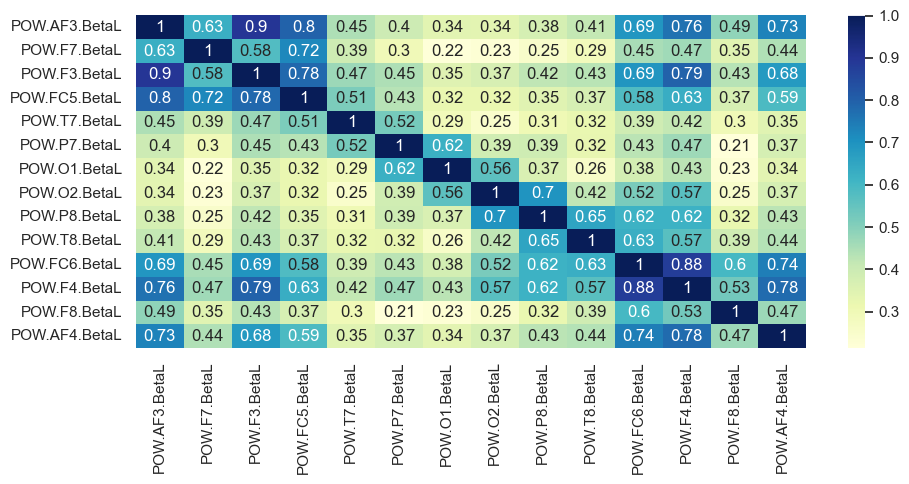

In [116]:
# BETAL Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(betaLt_df[betaL].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

In [117]:
# Add which pairs of sensors have high correlation to one another

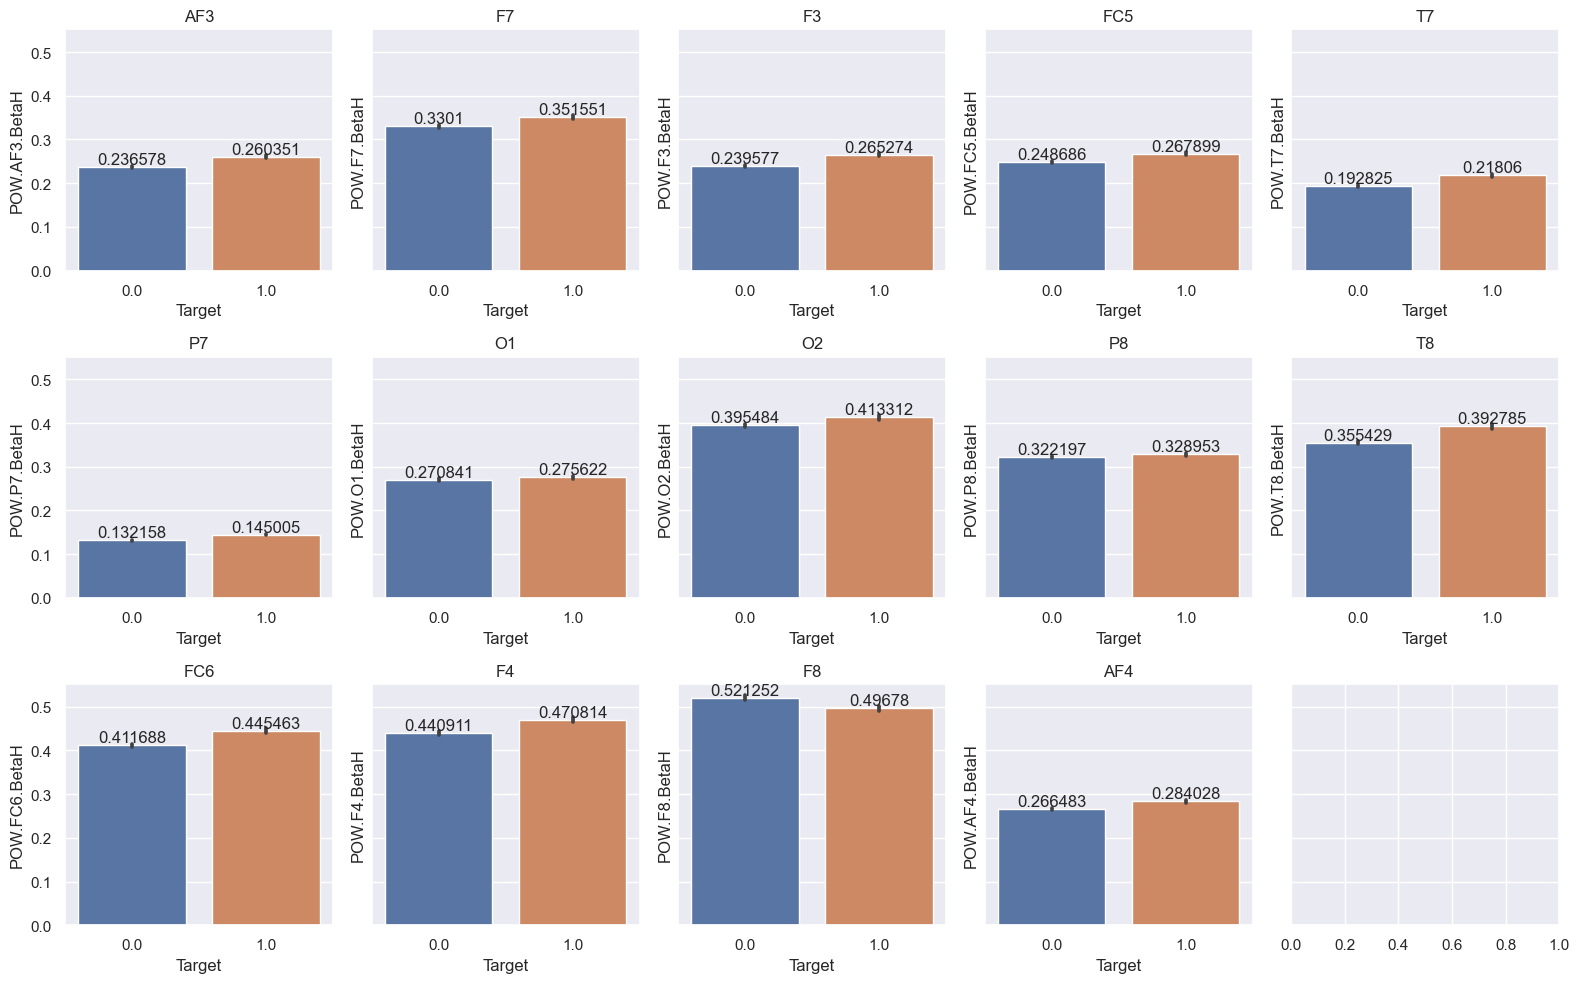

In [118]:
# BETAH barplot (each sensor)
sns.set(font_scale=1)

fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.BetaH'
    bar = sns.barplot(data=betaHt_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
            
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

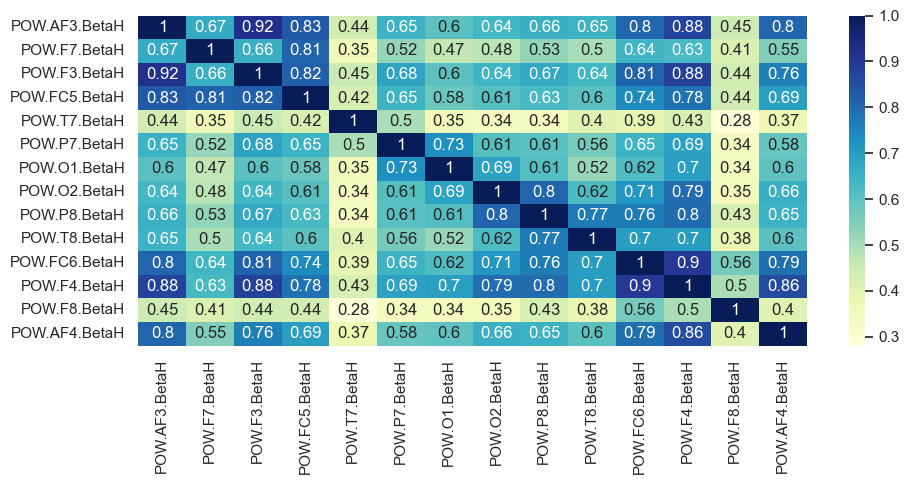

In [119]:
# BETAH Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(betaHt_df[betaH].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

In [120]:
# Add which pairs of sensors have high correlation to one another

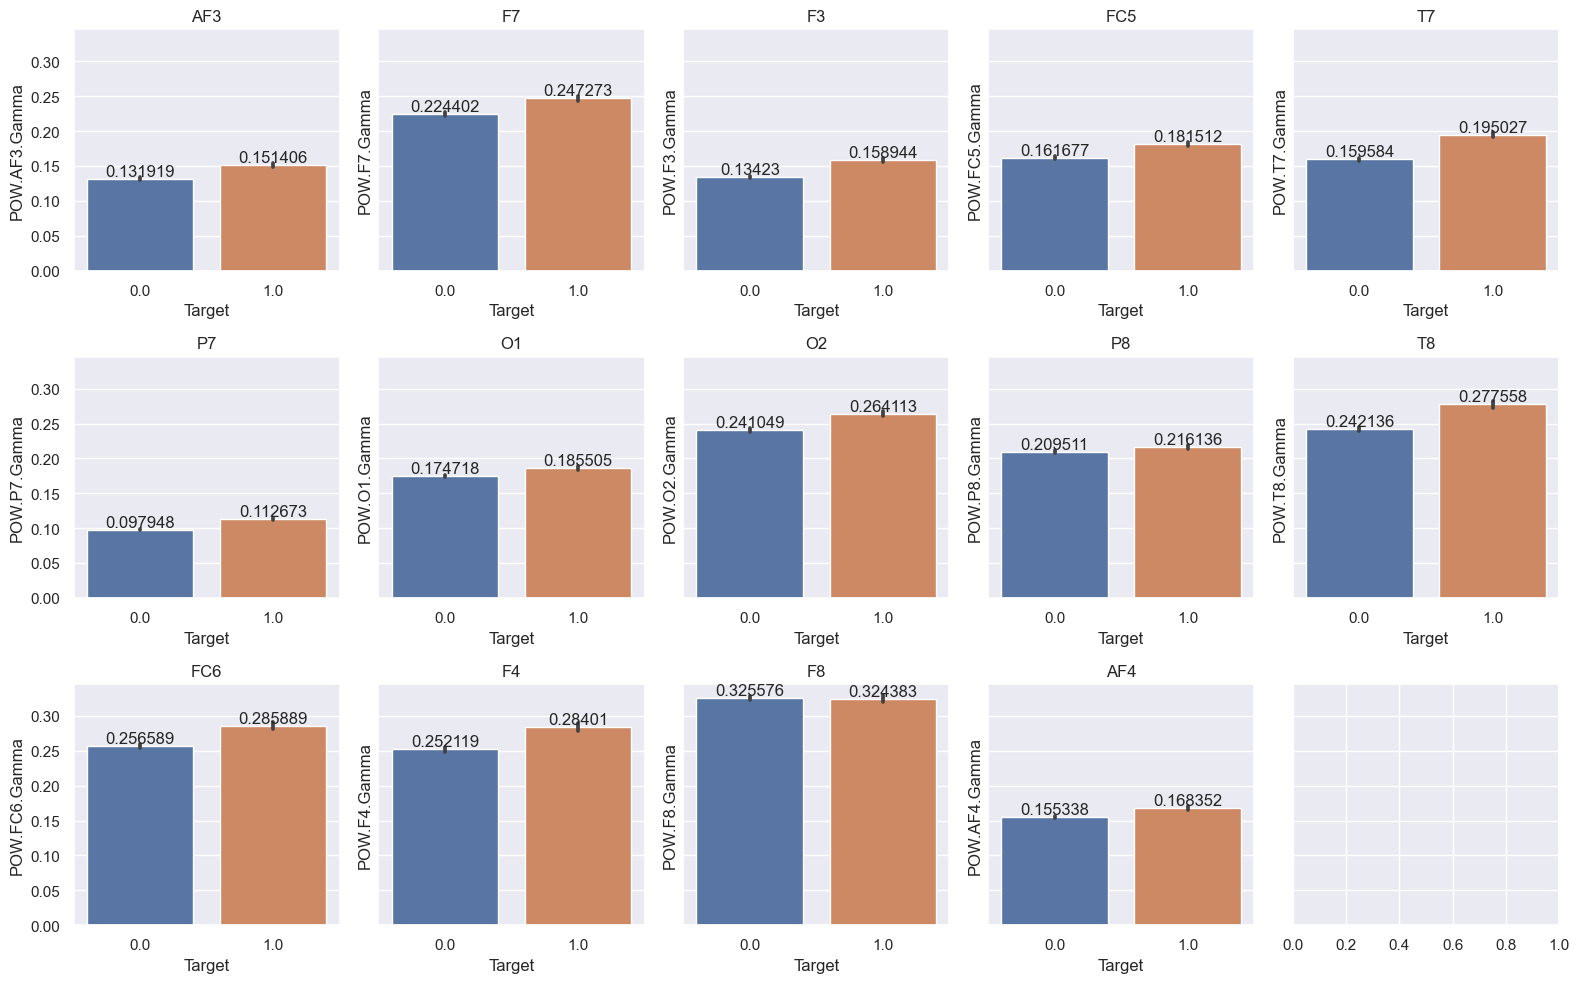

In [121]:
# GAMMA barplot (each sensor)
sns.set(font_scale=1)

fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.Gamma'
    bar = sns.barplot(data=gammat_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
                
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

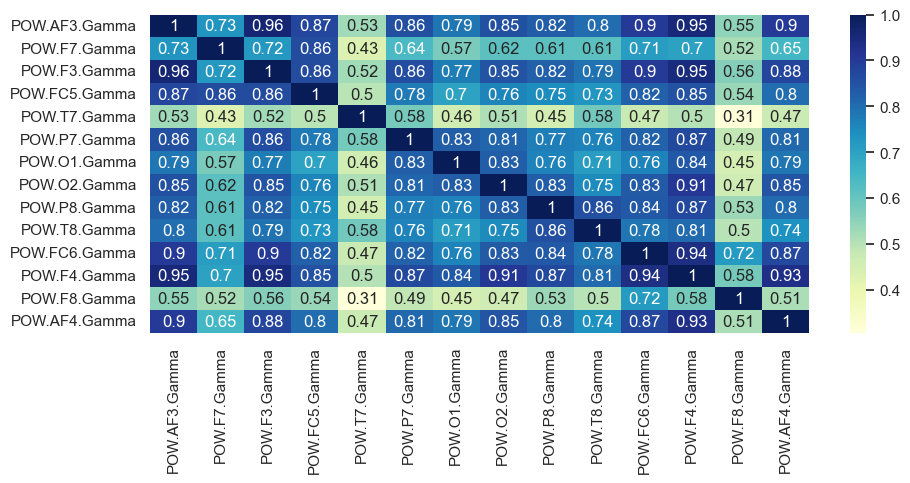

In [122]:
# GAMMA Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(gammat_df[gamma].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

In [123]:
# Add which pairs of sensors have high correlation to one another

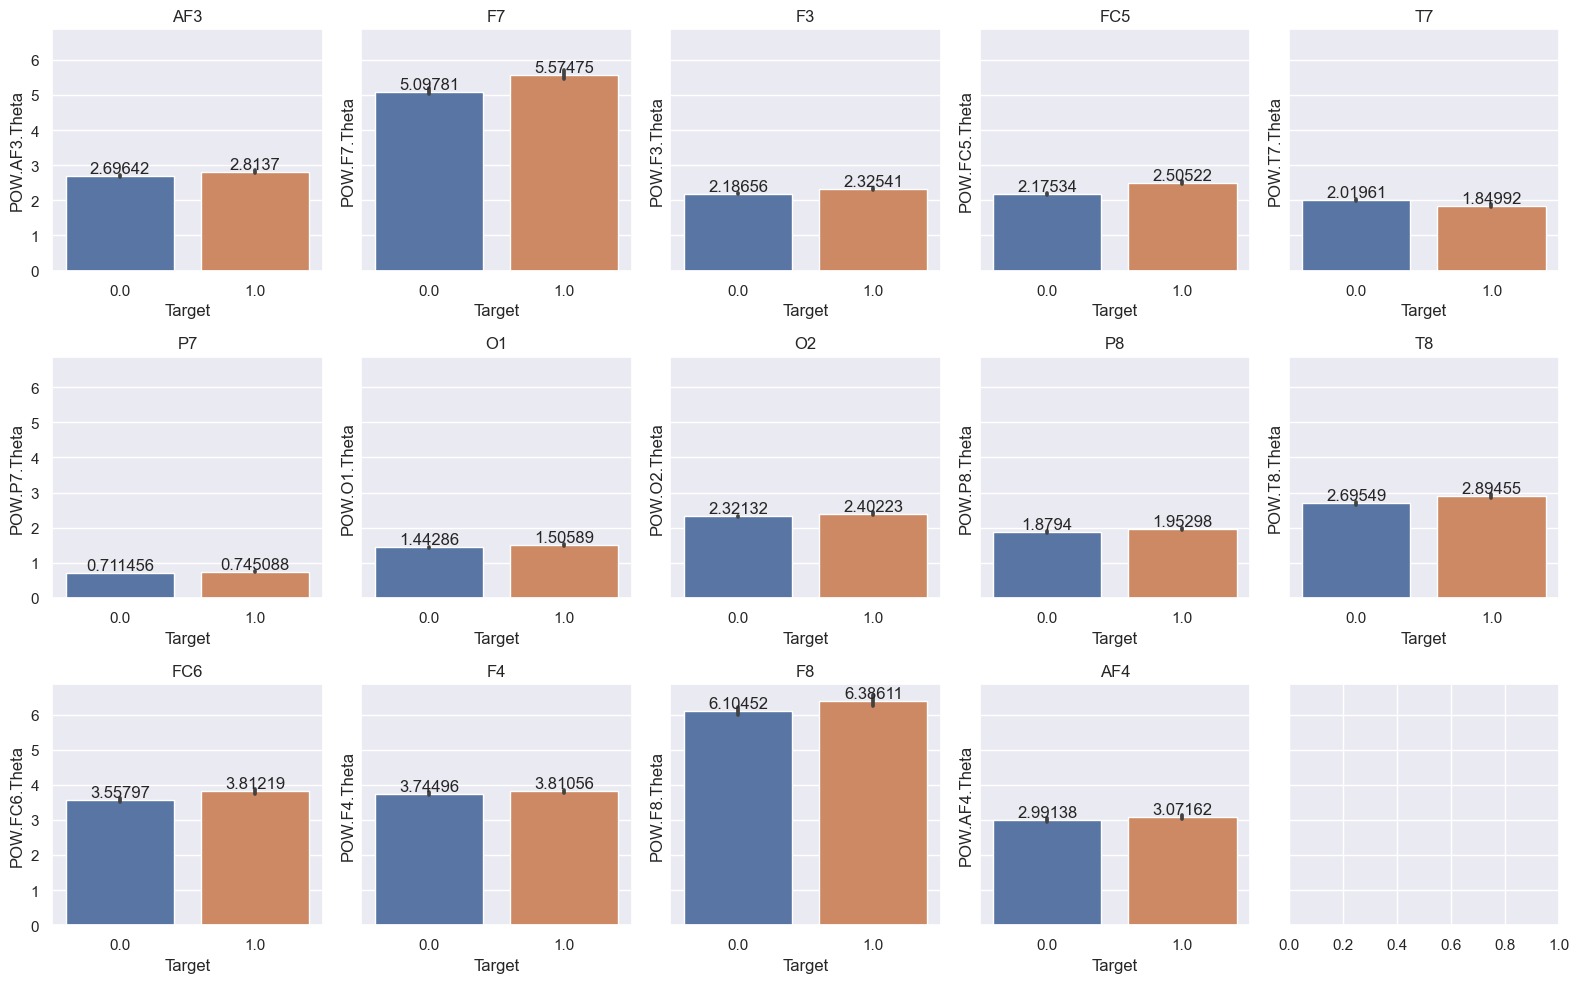

In [124]:
# THETA barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
sns.set(font_scale=1)

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.Theta'
    bar = sns.barplot(data=thetat_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
                    
    for l in bar.containers:
        bar.bar_label(l,)
        
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

There are no general patterns identified. Overall these sensors either show conflicting patterns, or have insignificant variation in their theta values, making it difficult to draw concrete insights.

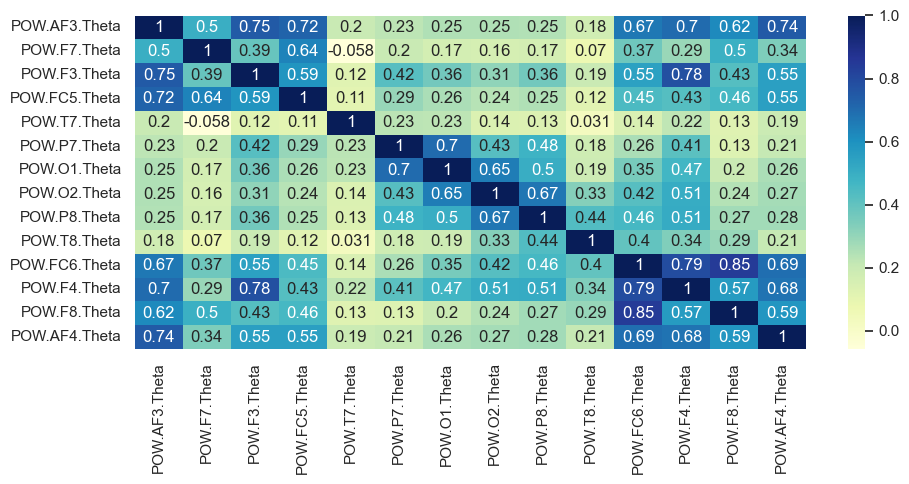

In [125]:
# THETA Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(thetat_df[theta].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

In [126]:
# Add which pairs of sensors have high correlation to one another


As many sensors are highly correlated to each other, we believe it will be useful to make use of Principal Component Analysis (PCA) before running our models on the wave data to capture the variation in the dataset and reduce the number of dimensions required.

## Section:1.5: Comparison with Luqman's dataset

### Cleaning of data

In [127]:
# Retrieve performance metrics (scaled values)
pm_l_df = df5[pm_scaled]
pm_l_df.head(5)

# Retrieve beta wave data (betaL, betaH)
beta_l_df = df5[betaL+betaH]
beta_l_df.head(5)

# Data for all types of brainwaves and sensors
other_brain_l_df = df5[other_brain_waves]
other_brain_l_df.head(5)

# Retrieve any other data to piece the Dataset together
add_l_df = df5[['EQ.OVERALL.New','Target','Song']]

In [128]:
# PM
pmc_l_df = pd.concat([pm_l_df, add_l_df], axis=1)
pmc_l_df.head(5)

# Remove if any NA or EQ.OVERALL.NEW < 90
pmc_l_df.dropna(how="any", axis=0, inplace=True)
pmc_l_df = pmc_l_df.drop(pmc_l_df[pmc_l_df["EQ.OVERALL.New"] < 90].index)
pmc_l_df["Song"].value_counts().sort_index()
pmc_l_df.head(5)

# Beta
betac_l_df = pd.concat([beta_l_df, add_l_df], axis=1)
betac_l_df.head()

# Remove if any NA or EQ.OVERALL.NEW < 90
betac_l_df.dropna(how="any", axis=0, inplace=True)
betac_l_df = betac_l_df.drop(betac_l_df[betac_l_df["EQ.OVERALL.New"] < 90].index).dropna()
betac_l_df["Song"].value_counts().sort_index()
betac_l_df.head()

# All waves
POW_l_df = pd.concat([other_brain_l_df, add_l_df], axis=1)
POW_l_df.head(5)

# Remove if any NA or EQ.OVERALL.NEW < 90
POW_l_df.dropna(how="any", axis=0, inplace=True)
POW_l_df = POW_l_df.drop(POW_l_df[POW_l_df["EQ.OVERALL.New"] < 90].index).dropna()
POW_l_df.head()

POW.AF3.Theta  POW.AF3.Alpha  POW.AF3.BetaL  POW.AF3.BetaH  \
16777      37.167900       9.783302       1.482152       1.103509   
16793      39.525978      10.959085       1.989584       1.139067   
16809      39.039295      11.571865       2.556355       1.110598   
16825      35.930229      11.466270       3.085340       1.042292   
16841      30.755667      10.566139       3.489212       0.981426   

       POW.AF3.Gamma  POW.F7.Theta  POW.F7.Alpha  POW.F7.BetaL  POW.F7.BetaH  \
16777       0.565504     27.043716      6.285285      1.067000      0.846473   
16793       0.548172     28.530968      7.055654      1.318115      0.926832   
16809       0.498951     28.374491      7.554694      1.630225      0.970615   
16825       0.433775     26.489855      7.623462      1.936733      0.969910   
16841       0.373694     22.932581      7.150863      2.191942      0.938679   

       POW.F7.Gamma  ...  POW.F8.BetaH  POW.F8.Gamma  POW.AF4.Theta  \
16777      0.532603  ...      0.971780      0.684602      22.413984   
16793      0.536570  ...      1.018255      0.642375      23.435471   
16809      0.521567  ...      1.032230      0.579547      22.695414   
16825      0.488449  ...      0.996145      0.511337      20.422644   
16841      0.446321  ...      0.919398      0.453730      17.081667   

       POW.AF4.Alpha  POW.AF4.BetaL  POW.AF4.BetaH  POW.AF4.Gamma  \
16777       7.475458       1.672922       0.957985       0.523840   
16793       9.095606       2.160362       0.977377       0.504673   
16809      10.361065       2.705513       0.963875       0.458663   
16825      10.912558       3.203615       0.904463       0.397908   
16841      10.526581       3.544618       0.815408       0.341539   

       EQ.OVERALL.New  Target  Song  
16777           100.0     0.0  37.0  
16793           100.0     0.0  37.0  
16809           100.0     0.0  37.0  
16825           100.0     0.0  37.0  
16841           100.0     0.0  37.0  

[5 rows x 73 columns]

### EDA on luqman's dataset

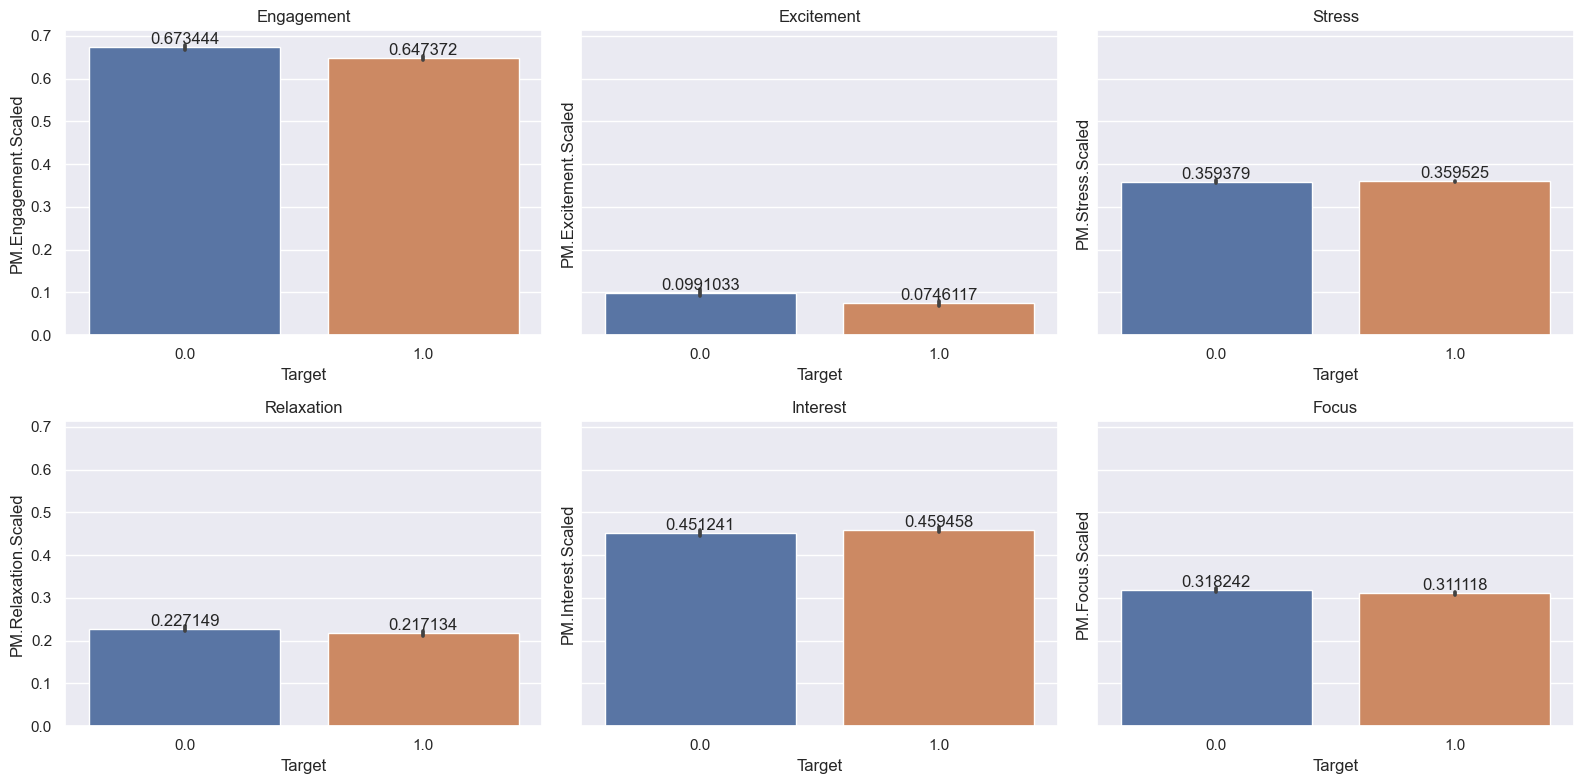

In [129]:
# Check relationship using barplots 
# Set Axes for multiple plots
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(16,8))

# Label axes
axes[0, 0].set_title('Engagement')
axes[0, 1].set_title('Excitement')
axes[0, 2].set_title('Stress')
axes[1, 0].set_title('Relaxation')
axes[1, 1].set_title('Interest')
axes[1, 2].set_title('Focus')

# Barplot for each Performance Measure (PM)
bar1 = sns.barplot(data=pmc_l_df, x='Target', y="PM.Engagement.Scaled", ax=axes[0, 0])
bar2 = sns.barplot(data=pmc_l_df, x='Target', y="PM.Excitement.Scaled", ax=axes[0, 1])
bar3 = sns.barplot(data=pmc_l_df, x='Target', y="PM.Stress.Scaled", ax=axes[0, 2])
bar4 = sns.barplot(data=pmc_l_df, x='Target', y="PM.Relaxation.Scaled", ax=axes[1, 0])
bar5 = sns.barplot(data=pmc_l_df, x='Target', y="PM.Interest.Scaled", ax=axes[1, 1])
bar6 = sns.barplot(data=pmc_l_df, x='Target', y="PM.Focus.Scaled", ax=axes[1, 2])


bar_list = [bar1, bar2, bar3, bar4, bar5, bar6]

for bar in bar_list:
    for l in bar.containers:
        bar.bar_label(l,)

fig.tight_layout()

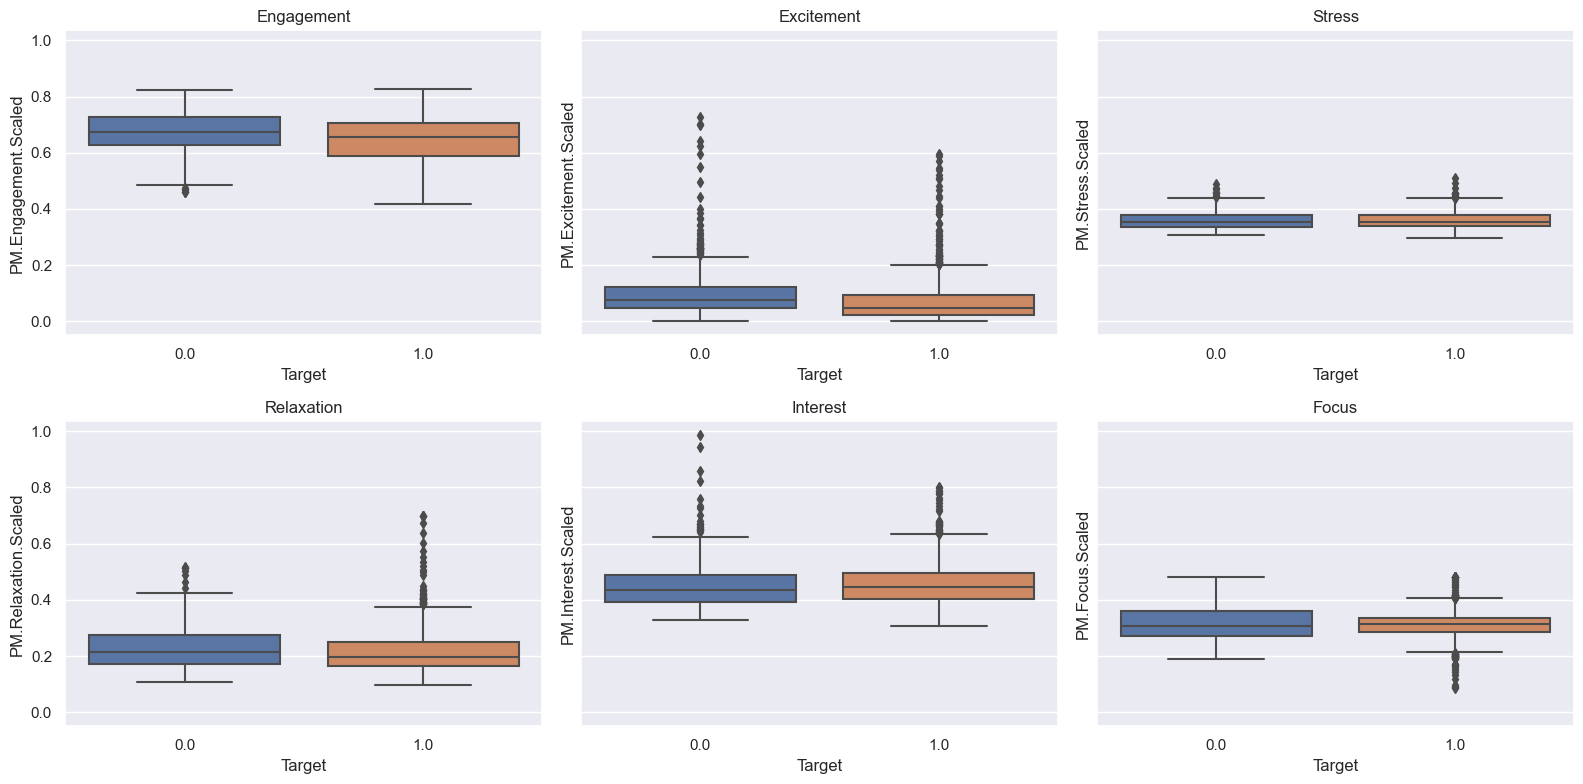

In [130]:
# Check distribution using boxplots
# Set Axes for multiple plots
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(16,8))

# Label axes
axes[0, 0].set_title('Engagement')
axes[0, 1].set_title('Excitement')
axes[0, 2].set_title('Stress')
axes[1, 0].set_title('Relaxation')
axes[1, 1].set_title('Interest')
axes[1, 2].set_title('Focus')

# Plot for each Performance Measure (PM)
sns.boxplot(data=pmc_l_df, x='Target', y="PM.Engagement.Scaled", ax=axes[0, 0])
sns.boxplot(data=pmc_l_df, x='Target', y="PM.Excitement.Scaled", ax=axes[0, 1])
sns.boxplot(data=pmc_l_df, x='Target', y="PM.Stress.Scaled", ax=axes[0, 2])
sns.boxplot(data=pmc_l_df, x='Target', y="PM.Relaxation.Scaled", ax=axes[1, 0])
sns.boxplot(data=pmc_l_df, x='Target', y="PM.Interest.Scaled", ax=axes[1, 1])
sns.boxplot(data=pmc_l_df, x='Target', y="PM.Focus.Scaled", ax=axes[1, 2])

fig.tight_layout()

In [131]:
# Collect respective wave dfs 
# Alpha
alphat_l_df = POW_l_df[alphat] 

# Beta 
betaLt_l_df = POW_l_df[betaLt]
betaHt_l_df = POW_l_df[betaHt]

# Gamma
gammat_l_df = POW_l_df[gammat]

# Theta
thetat_l_df = POW_l_df[thetat]

In [132]:
# Create mean column (across sensors for each row) - mean of each row required if boxplot is to be shown 
alphat_l_df['sensor_mean'] = alphat_l_df.drop(['Target'], axis=1).mean(axis=1)
betaLt_l_df['sensor_mean'] = betaLt_l_df.drop(['Target'], axis=1).mean(axis=1)
betaHt_l_df['sensor_mean'] = betaHt_l_df.drop(['Target'], axis=1).mean(axis=1)
gammat_l_df['sensor_mean'] = gammat_l_df.drop(['Target'], axis=1).mean(axis=1)
thetat_l_df['sensor_mean'] = thetat_l_df.drop(['Target'], axis=1).mean(axis=1)

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_7618/124507372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alphat_l_df['sensor_mean'] = alphat_l_df.drop(['Target'], axis=1).mean(axis=1)
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_7618/124507372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betaLt_l_df['sensor_mean'] = betaLt_l_df.drop(['Target'], axis=1).mean(axis=1)
/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_7618/124507372.py:4: SettingWithCopyWarning

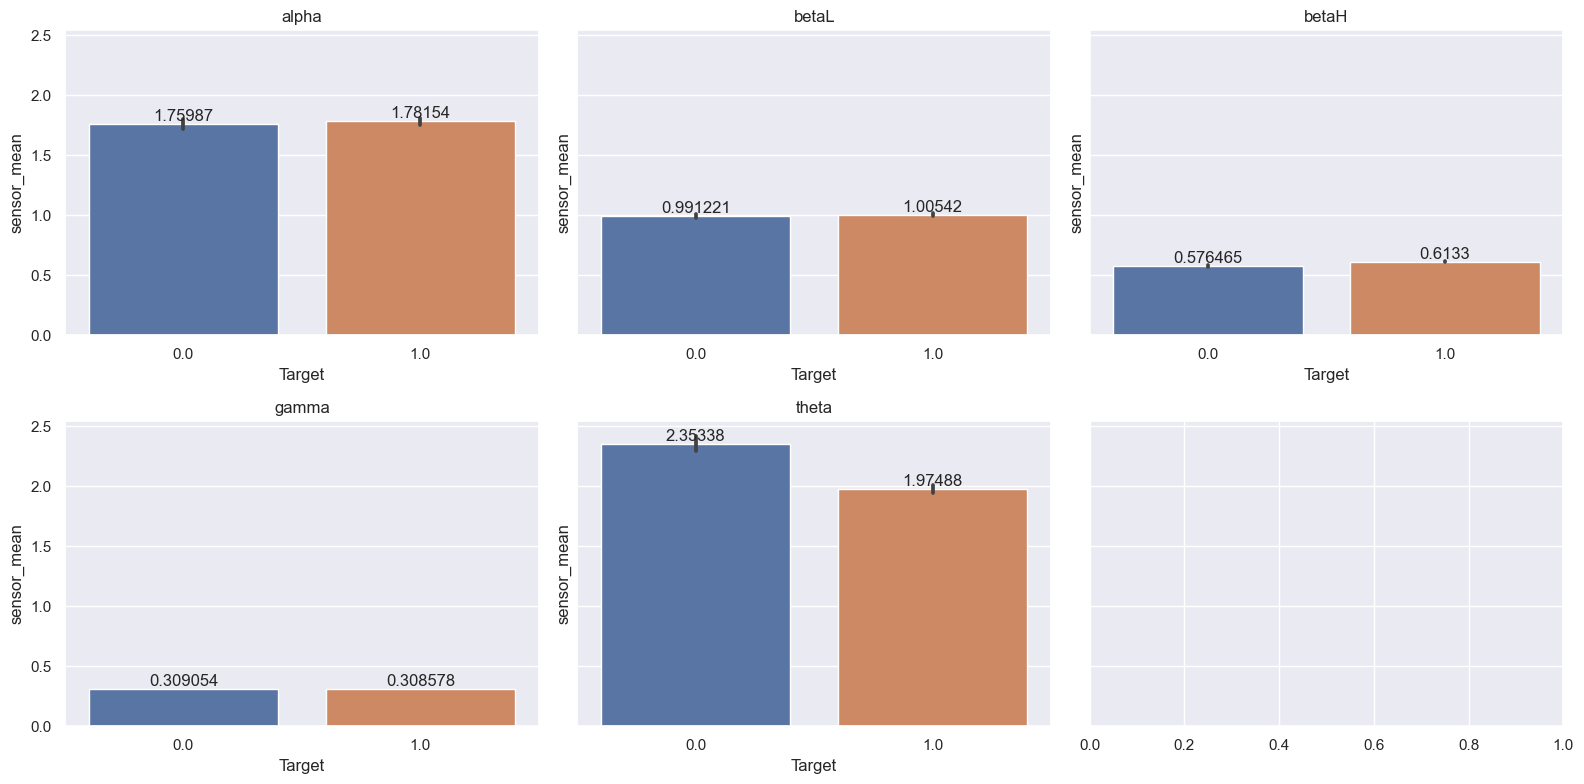

In [133]:
# Barplot of sensor mean data for each type of brainwave
fig, axes = plt.subplots(2, 3, figsize=(16,8), sharey=True)

i = 0
j = 0
counter = 0
wave_title = ['alpha','betaL','betaH','gamma','theta']

for wave in [alphat_l_df, betaLt_l_df, betaHt_l_df, gammat_l_df, thetat_l_df]:

    bar = sns.barplot(data=wave, x="Target", y="sensor_mean", ax=axes[i, j])
    axes[i, j].set_title(wave_title[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
        
    if j != 2:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

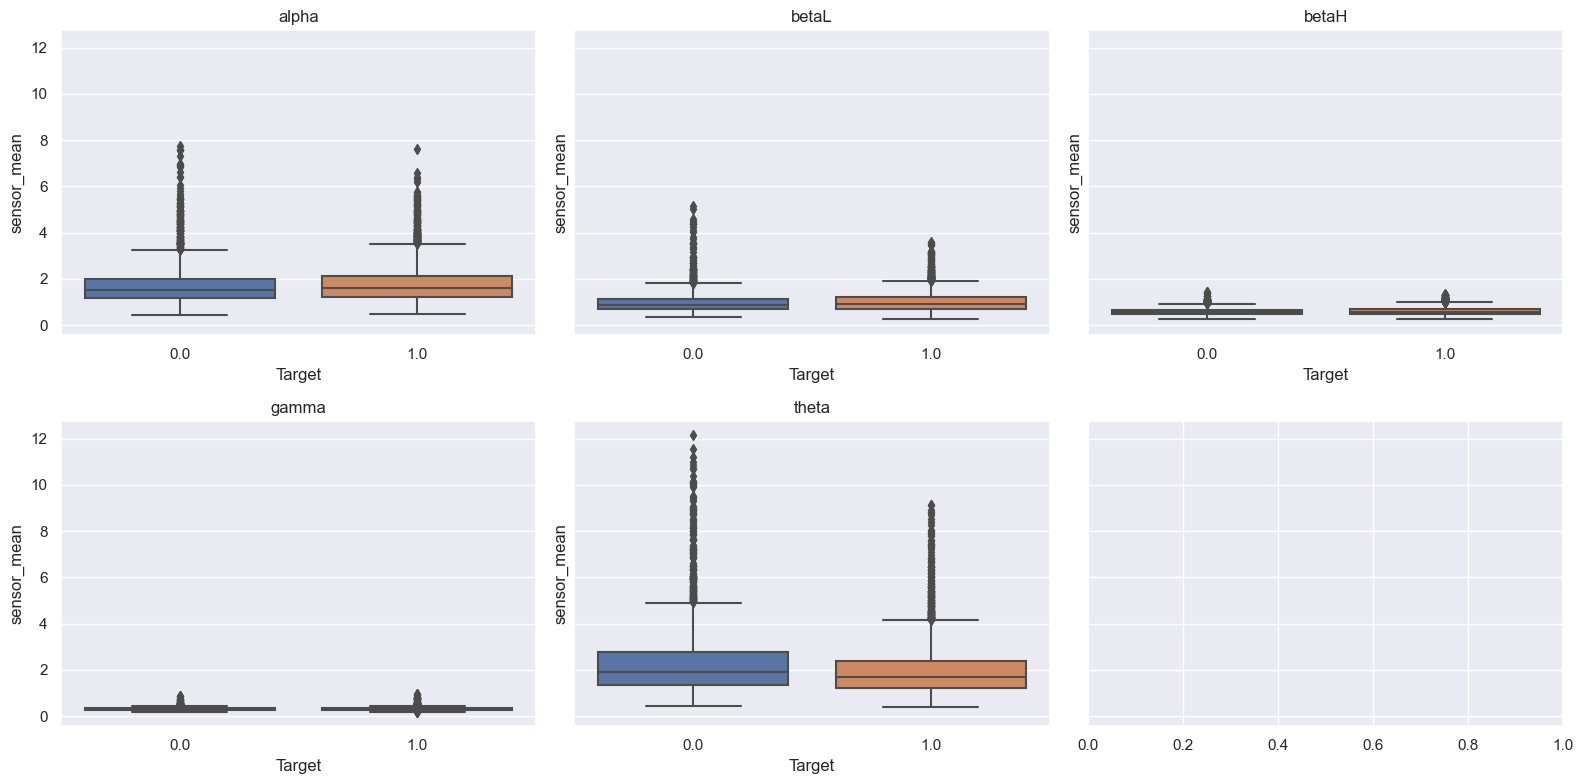

In [134]:
# Boxplot of sensor mean data for each type of brainwave
fig, axes = plt.subplots(2, 3, figsize=(16,8), sharey=True)

i = 0
j = 0
counter = 0
wave_title = ['alpha','betaL','betaH','gamma','theta']
sns.set(font_scale=1)

for wave in [alphat_l_df, betaLt_l_df, betaHt_l_df, gammat_l_df, thetat_l_df]:

    sns.boxplot(data=wave, x="Target", y="sensor_mean", ax=axes[i, j])
    axes[i, j].set_title(wave_title[counter])
    counter += 1
    
    if j != 2:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

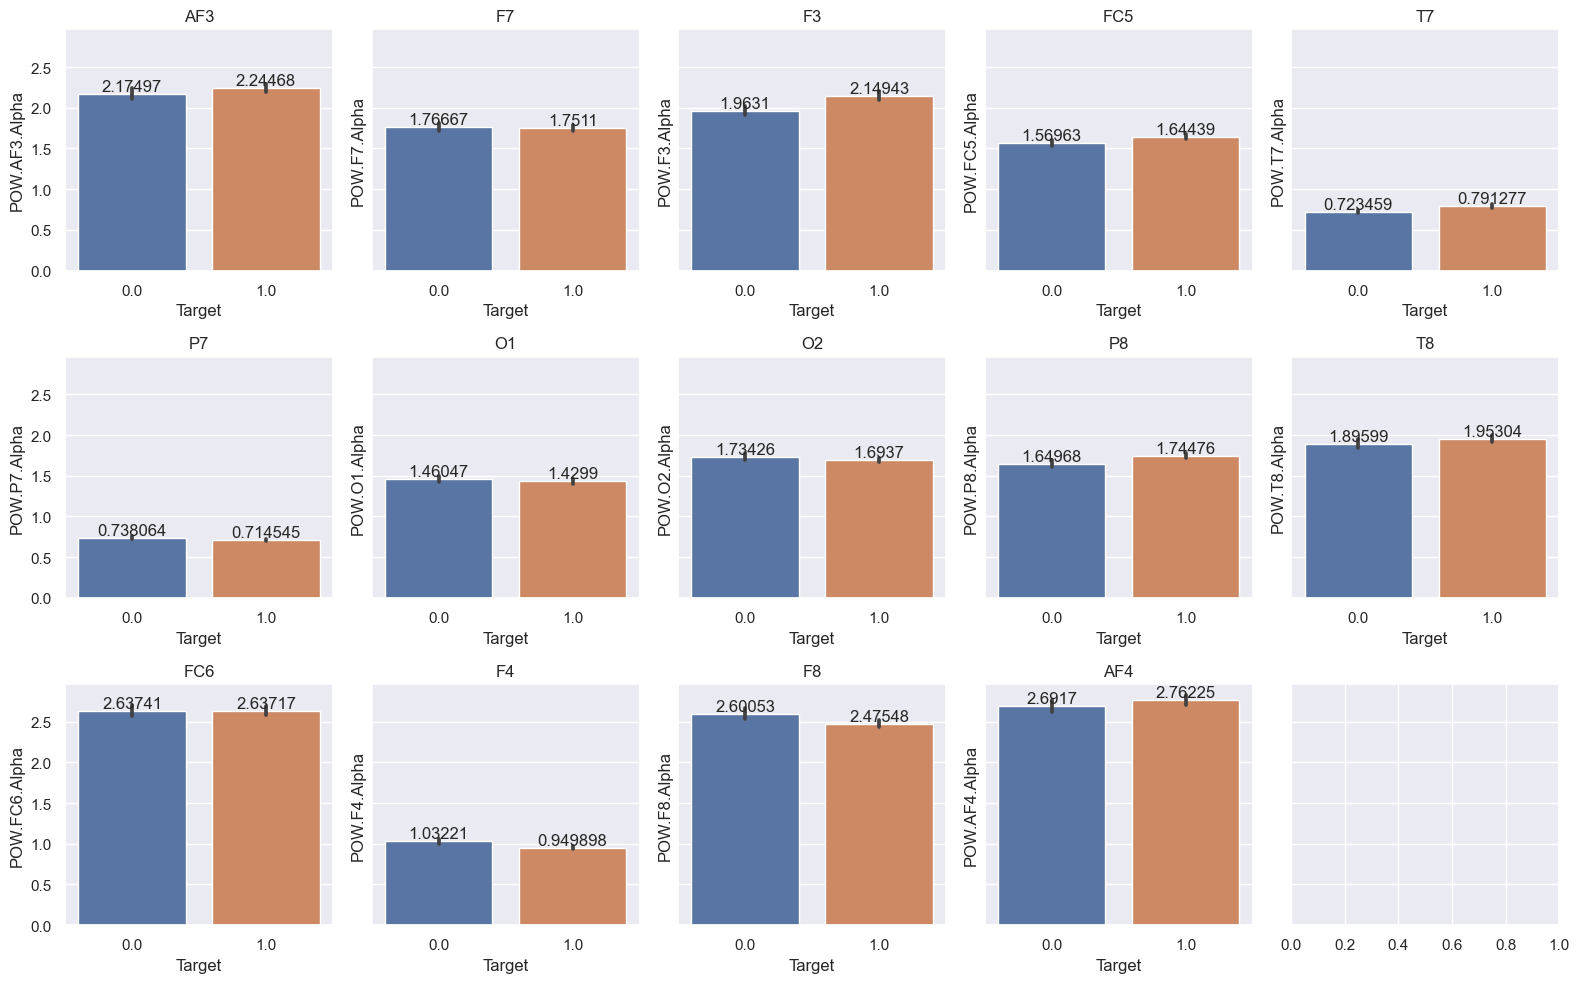

In [135]:
# ALPHA barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
sns.set(font_scale=1)

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.Alpha'
    bar = sns.barplot(data=alphat_l_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
        
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

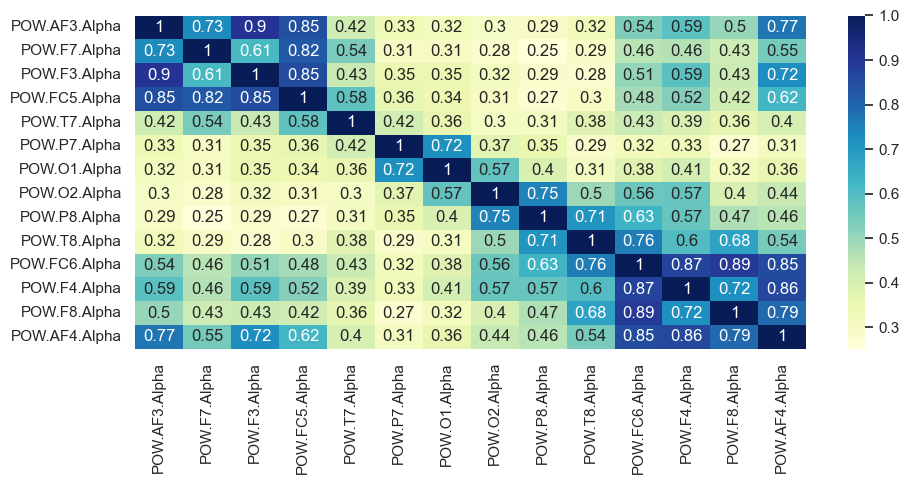

In [136]:
# ALPHA Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(alphat_l_df[alpha].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

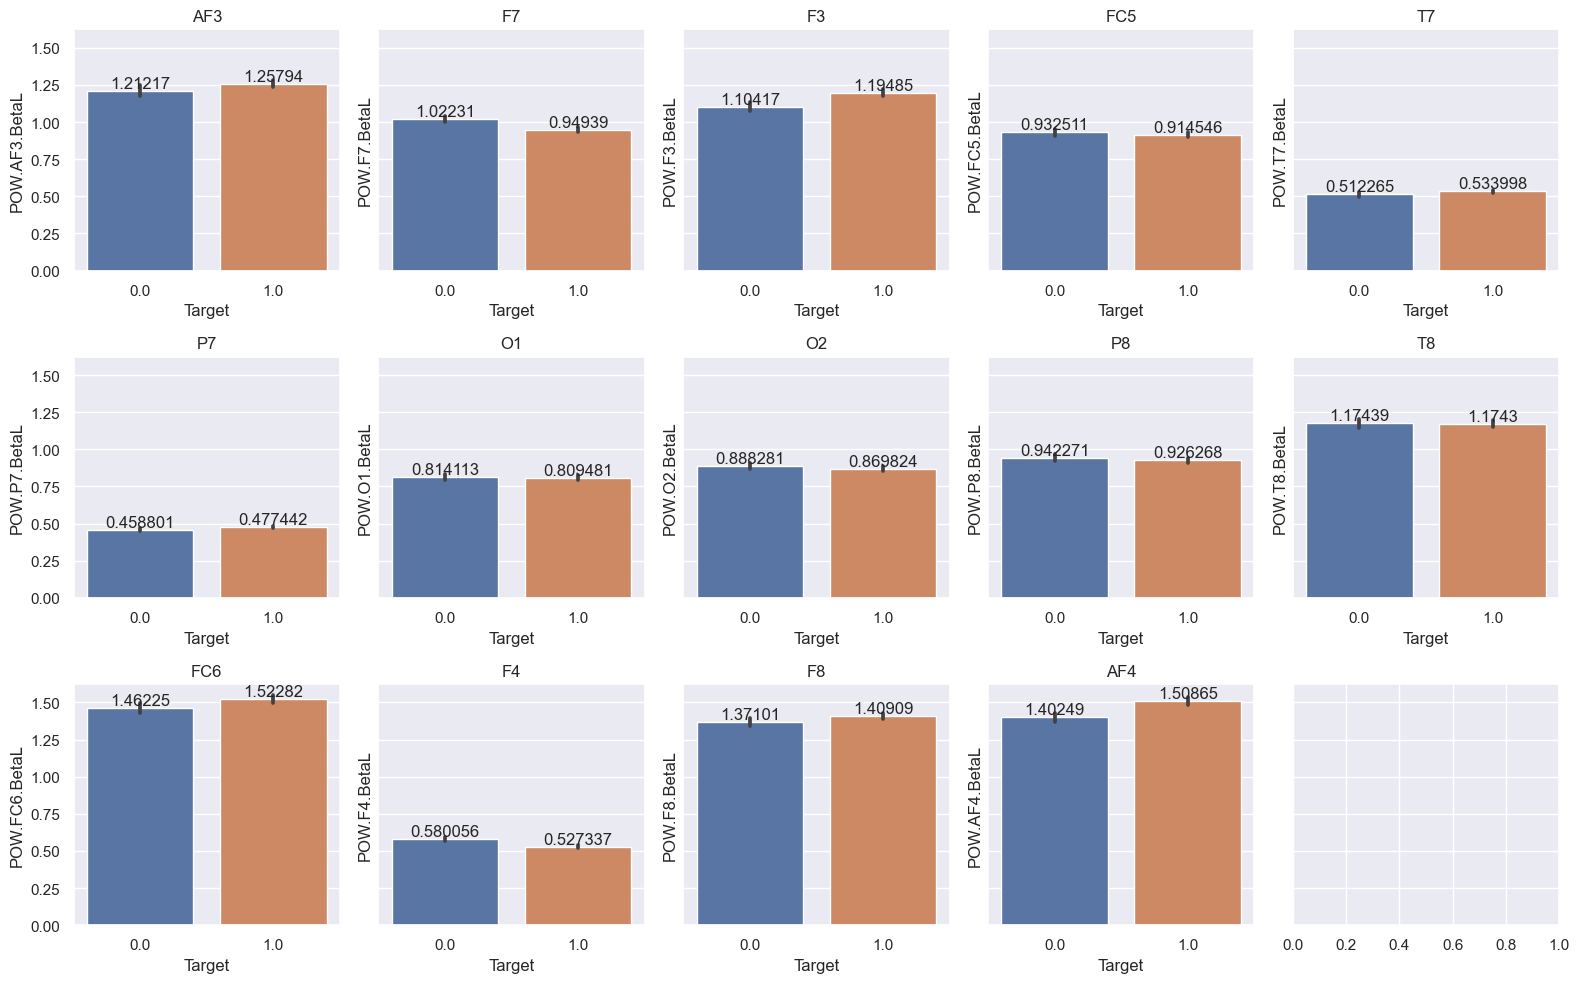

In [137]:
# BETAL barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
sns.set(font_scale=1)

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.BetaL'
    bar = sns.barplot(data=betaLt_l_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

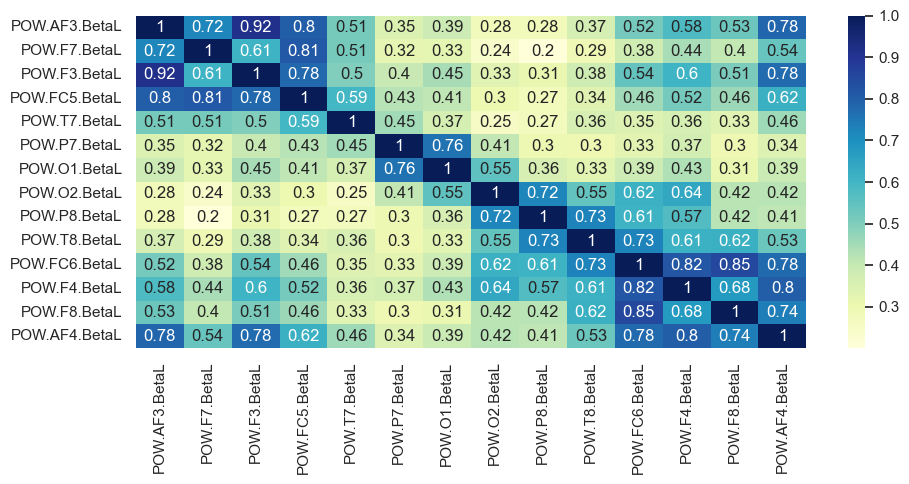

In [138]:
# BETAL Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(betaLt_l_df[betaL].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

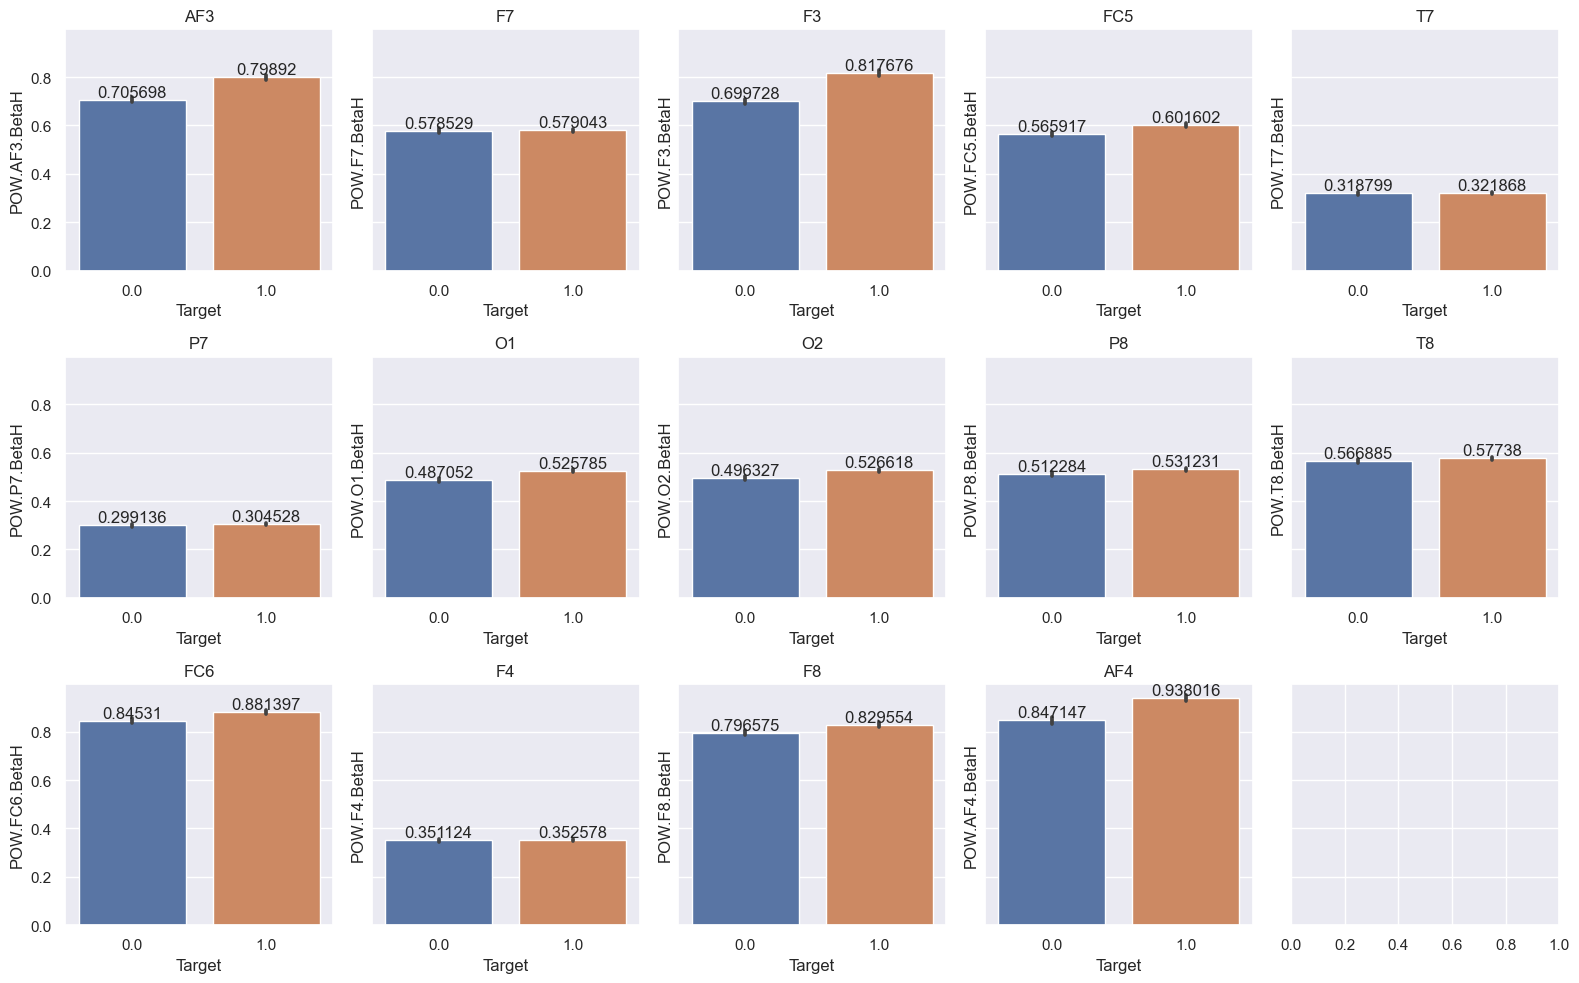

In [139]:
# BETAH barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
sns.set(font_scale=1)

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.BetaH'
    bar = sns.barplot(data=betaHt_l_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

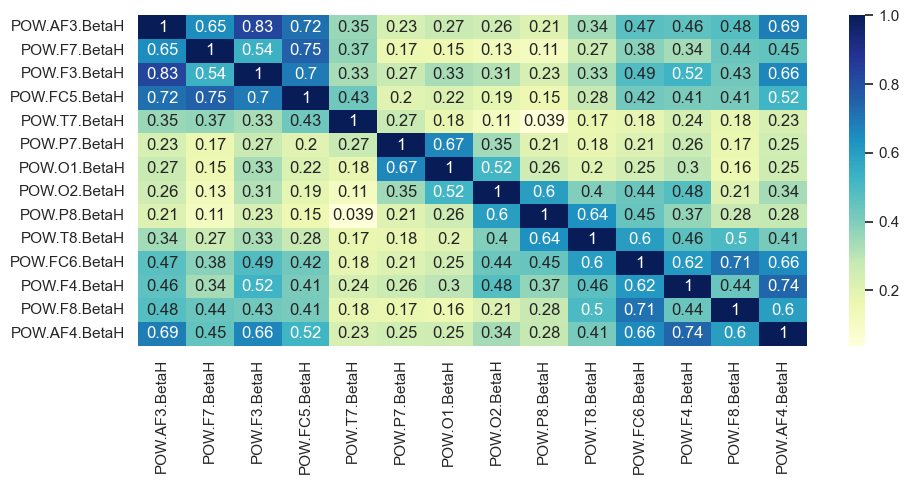

In [140]:
# BETAH Correlation heatmap
sns.set(font_scale=1)

plt.figure(figsize=(10, 5), dpi=100)
dataplot = sns.heatmap(betaHt_l_df[betaH].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

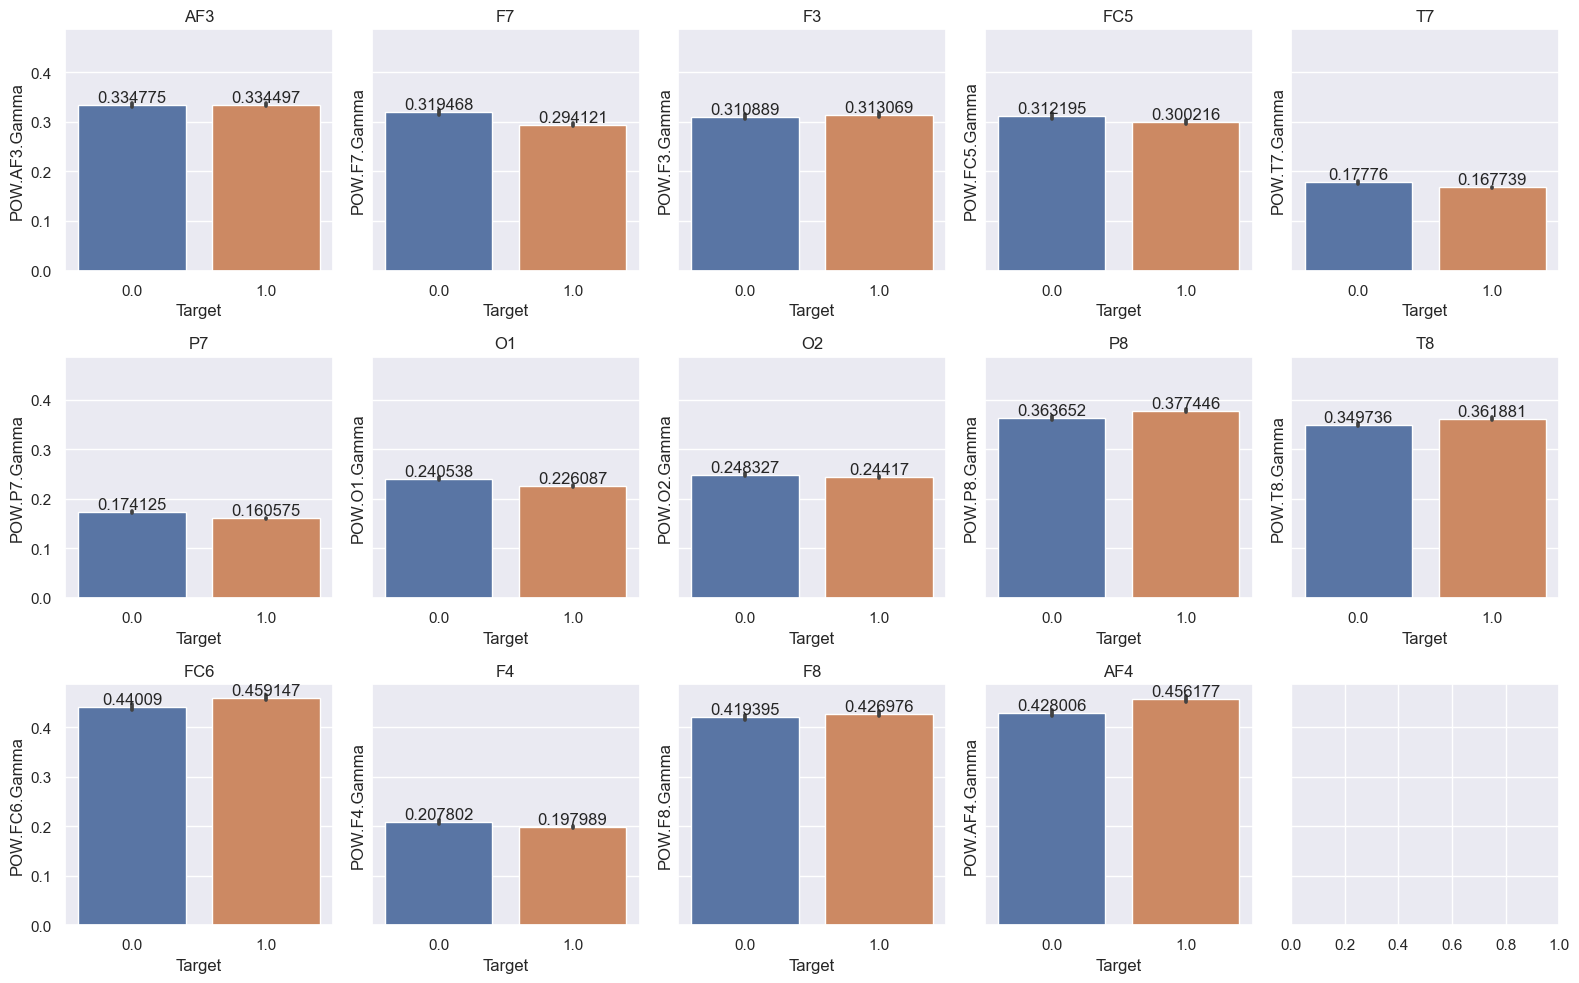

In [141]:
# GAMMA barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
sns.set(font_scale=1)

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.Gamma'
    bar = sns.barplot(data=gammat_l_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

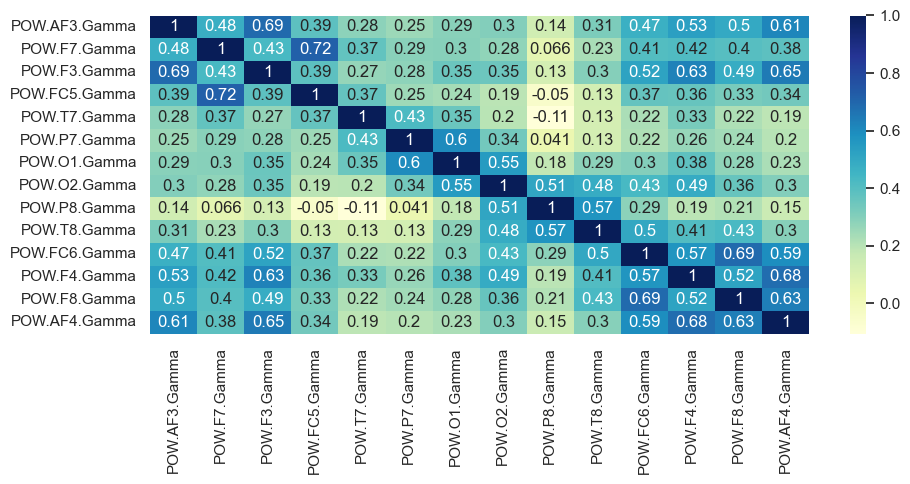

In [142]:
# GAMMA Correlation heatmap
plt.figure(figsize=(10, 5), dpi=100)
sns.set(font_scale=1)

dataplot = sns.heatmap(gammat_l_df[gamma].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()

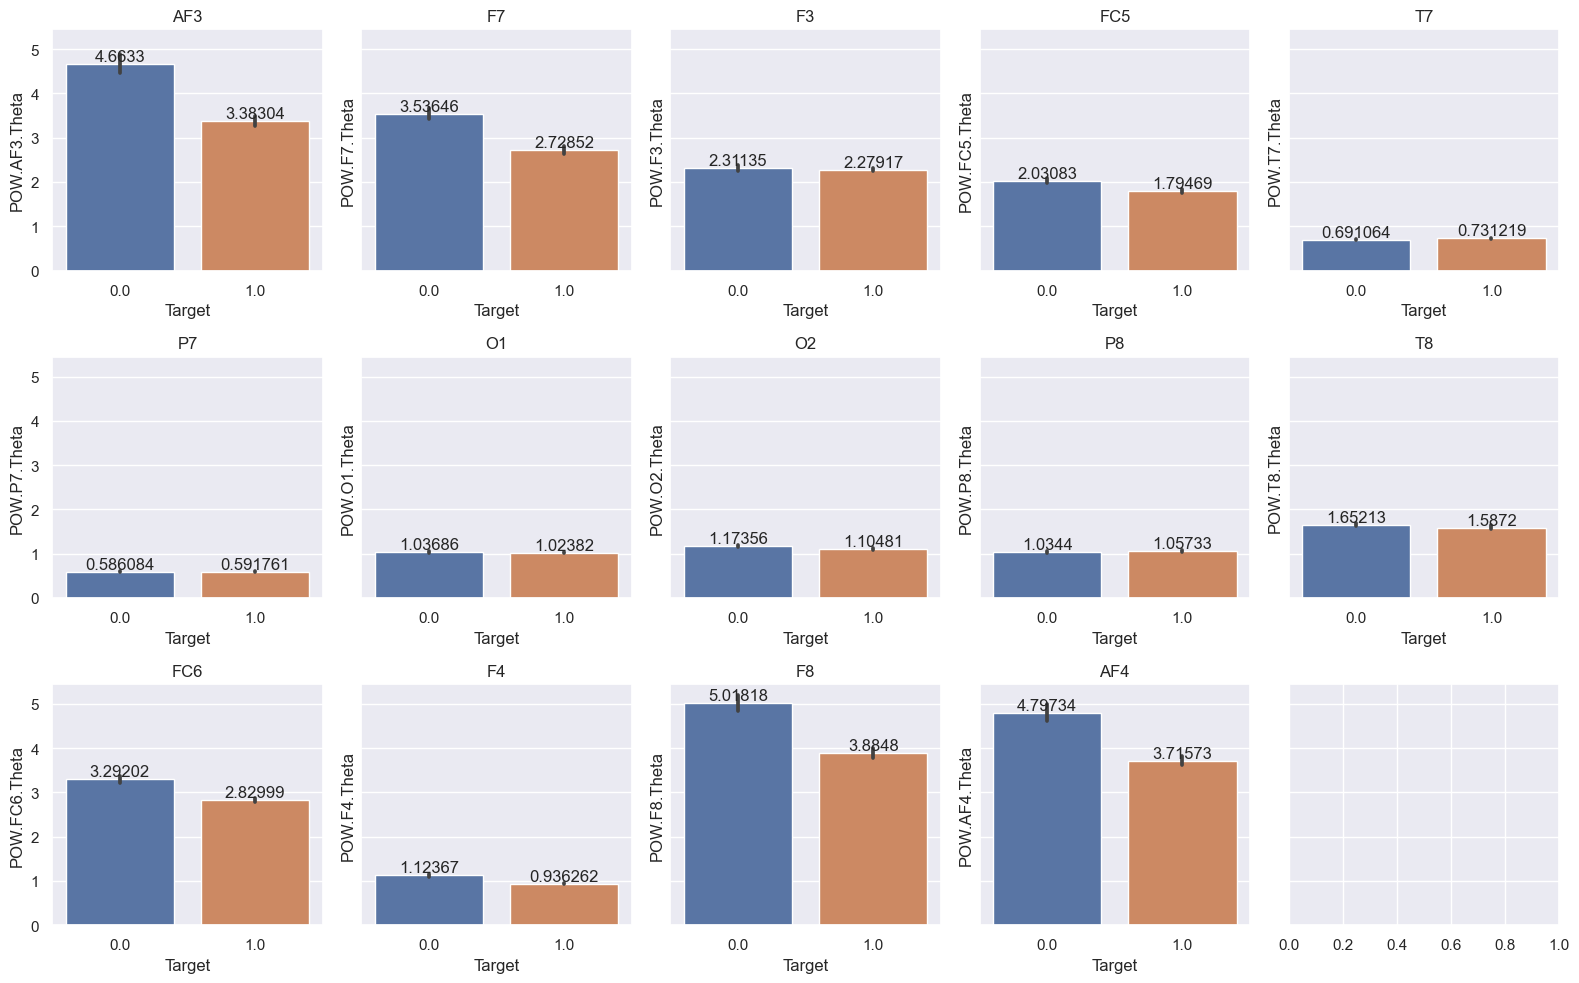

In [143]:
# THETA barplot (each sensor)
fig, axes = plt.subplots(3, 5, figsize=(16,10), sharey=True)

i = 0
j = 0
counter = 0
sensor_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
sns.set(font_scale=1)

for sensor in sensor_list:
    col_name = 'POW.' + sensor + '.Theta'
    bar = sns.barplot(data=thetat_l_df, x="Target", y=col_name, ax=axes[i, j])
    axes[i, j].set_title(sensor_list[counter])
    counter += 1
    
    for l in bar.containers:
        bar.bar_label(l,)
    
    if j != 4:
        j += 1
    else:
        j = 0
        i += 1
    
plt.tight_layout()

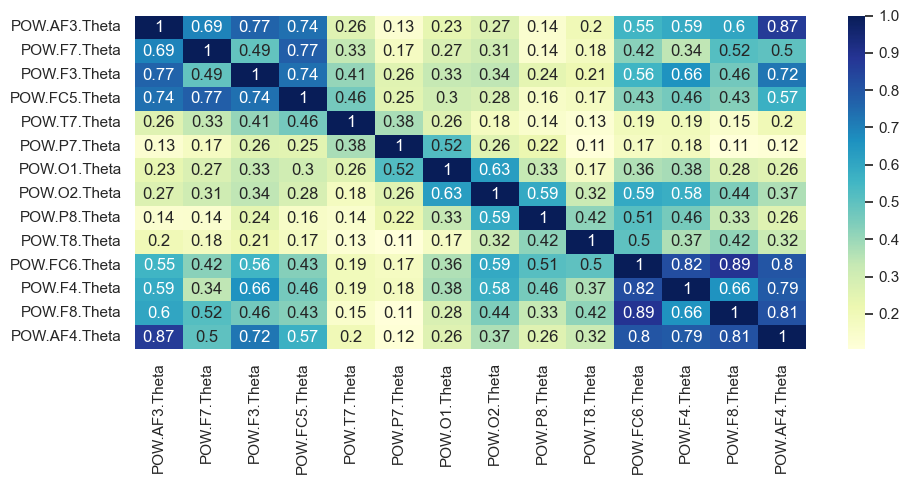

In [144]:
# THETA Correlation heatmap
plt.figure(figsize=(10, 5), dpi=100)
sns.set(font_scale=1)

dataplot = sns.heatmap(thetat_l_df[theta].corr(), cmap="YlGnBu", annot=True)

plt.tight_layout()
plt.show()